In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
data=pd.concat(pd.read_excel('/content/drive/My Drive/Colab Notebooks/online_retail_II.xlsx', sheet_name=None), ignore_index=True)

In [ ]:
df=pd.DataFrame(data.copy())
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.shape

(1067371, 8)

In [ ]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

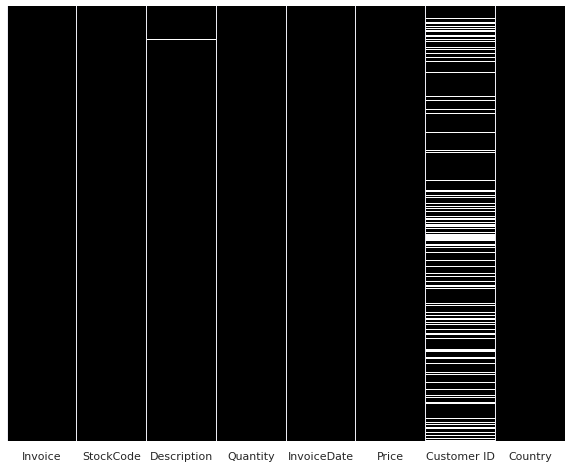

In [ ]:
plt.subplots(figsize=(10, 8))
sns.heatmap(df.isnull(), yticklabels = False,cbar = False, cmap='cubehelix')
plt.show()

In [ ]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

From above we can see that Description and Customer ID contains missing values, this fact will be processed and examine in further steps

In [ ]:
df.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

From descriptive statistics of quantitative variables (Quantity and Price), we could see that there are negative values in these variables, which are only possible in retail industry if:
###Price:
 The order/item was returened and payment is reimbursed. which can be used to indicate the quality of customer stisfaction and can be the triggering point for Quality Assurance Unit to take actions to minimize the order return rate

####Qunatity:
Selling items with insufficient stock in store If you then sell more quantity than you currently have in stock to a customer, the item will have a negative quantity on hand (QOH) and appear in the Negative inventory report.

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


Let's have a closer look on the reason of negative values in these variables. In the description of dataset it is written that there are some canceled transactions presented in dataset. Canceled transactions is indicated by invoice number which starts with letter 'c'. Probably transactions with negative values of quantity are canceled.

Let's have a closer look on the reason of negative values in these variables. In the description of dataset it is written that there are some canceled transactions presented in dataset. Canceled transactions is indicated by invoice number which starts with letter 'c'. Probably transactions with negative values of quantity are canceled.

Filtering transaction with invoice number started with letter 'C':

In [ ]:
cancelledOrder = df[df['Invoice'].astype(str).str.contains('C')]
cancelledOrder.head(20)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,Dec,2009,1,Tuesday,4,10,10:33,2009-12-01,1,0,1
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,Dec,2009,1,Tuesday,4,10,10:33,2009-12-01,1,0,1
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,Dec,2009,1,Tuesday,4,10,10:33,2009-12-01,1,0,1
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,Dec,2009,1,Tuesday,4,10,10:33,2009-12-01,1,0,1
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,Dec,2009,1,Tuesday,4,10,10:33,2009-12-01,1,0,1
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia,Dec,2009,1,Tuesday,4,10,10:33,2009-12-01,1,0,1
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia,Dec,2009,1,Tuesday,4,10,10:33,2009-12-01,1,0,1
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia,Dec,2009,1,Tuesday,4,10,10:33,2009-12-01,1,0,1
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,Dec,2009,1,Tuesday,4,10,10:33,2009-12-01,1,0,1
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom,Dec,2009,1,Tuesday,4,10,10:44,2009-12-01,0,0,1


In [ ]:
cancelledOrder[cancelledOrder['Quantity']>=0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays


Among cancelledOrder transactions there is no transaction with positive quantity. Hovewer some transactions with negative quantity doesn't belong to cancelledOrder

In [ ]:
print("CancelledOrder transactions:", len(cancelledOrder))
print("Total transaction with negative quantity:", df[df['Quantity'] <= 0 ]['Quantity'].count())

CancelledOrder transactions: 17990
Total transaction with negative quantity: 21378


There are also transactions with zero price. Transactions with zero price doesn't bring usefull information to analysis, moreover mainly there are not any description for such transactions. This transactions could be deleted.

In [ ]:
 d = df[~df['Invoice'].astype(str).str.contains('C')]  
df_QP = d[[ 'Quantity', 'Price']]
QP= df_QP.apply(lambda x:x['Quantity'] <= 0 and x['Price'] <= 0, axis=1)
df_QP = df_QP[QP].reset_index()
df_QP.head(10)

,index,Quantity,Price
0,263,-96,0.0
1,283,-240,0.0
2,284,-192,0.0
3,462,-50,0.0
4,3077,-44,0.0
5,3125,-1043,0.0
6,3131,-117,0.0
7,4233,-770,0.0
8,4471,-720,0.0
9,4499,-240,0.0


This means, they got orders for the low/empty stock qunatity and they received the order but not shipped the order neither accepted the payment of those items. This should be indicated to Development Team to add the functionality in the system that if:
1. The item become out of stock, it should shows to the customer out of stock in the front-end so the customer cannot place the order and there would be no messy data should generate for those items in the database.
2. Out of stock notification should be shown to relavent vendors and CRM monitoring units.

In [ ]:
print("% of cancelledOrder transactions:" , round(len(cancelledOrder)/len(df)*100, 2),"%")
print("% of transactions with zero or negative price" ,round(len(df[df['Price']<=0])/len(df)*100, 2),"%")

% of cancelledOrder transactions: 1.75 %
% of transactions with zero or negative price 0.58 %


Hovewer some transactions with negative quantity doesn't belong to cancelledOrder:

## **Dropping UnSpecified Country Rows**



In [ ]:
df[df['Country']=='Unspecified'].shape

(756, 8)

In [ ]:
df.drop(df[df['Country']=='Unspecified'].index,inplace=True)

# **Dropping duplicate rows**





In [ ]:
#Checking duplicate rows in DataFrame
df.loc[df.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067136,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067153,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
1067160,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
#Removing Duplicate rows in DataFrame
df.drop_duplicates(inplace=True)

In [ ]:
#Checking duplicate rows in DataFrame
df.loc[df.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [ ]:
df.shape

(1032284, 8)

In [ ]:
#Resetting the index value 
df = df.reset_index(drop=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1032284.0,10.077719,175.261214,-80995.00,1.00,3.0,10.00,80995.0
Price,1032284.0,4.614039,122.436501,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,797364.0,15313.527045,1696.367042,12346.00,13967.00,15228.0,16791.00,18287.0


In [ ]:
df.describe(include='all').T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Invoice,1.03228e+06,53600,573585,1114,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,1032284,5305,85123A,5652,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1028009,5698,WHITE HANGING HEART T-LIGHT HOLDER,5739,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1.03228e+06,NaN,NaN,NaN,NaT,NaT,10.0777,175.261,-80995,1,3,10,80995
InvoiceDate,1032284,47611,2011-10-31 14:41:00,1114,2009-12-01 07:45:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1.03228e+06,NaN,NaN,NaN,NaT,NaT,4.61404,122.437,-53594.4,1.25,2.1,4.15,38970
Customer ID,797364,NaN,NaN,NaN,NaT,NaT,15313.5,1696.37,12346,13967,15228,16791,18287
Country,1032284,42,United Kingdom,948321,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From descriptive statistics of quantitative variables (Quantity and Price), we could see that there are negative values in these variables, which are only possible in retail industry if:

**Price:**
The order/item was returened and payment is reimbursed. which can be used to indicate the quality of customer stisfaction and can be the triggering point for Quality Assurance Unit to take actions to minimize the order return rate

**Qunatity:**
Selling items with insufficient stock in store If you then sell more quantity than you currently have in stock to a customer, the item will have a negative quantity on hand (QOH) and appear in the Negative inventory report.

# Feature Selection

In [ ]:
# converting arrival date into quarter,dayofweek,day,month and year
df['Month']=pd.DatetimeIndex(df['InvoiceDate']).strftime('%b')
df['Year']=pd.DatetimeIndex(df['InvoiceDate']).year
df['Day']=pd.DatetimeIndex(df['InvoiceDate']).day
df['Daysofweek']=pd.DatetimeIndex(df['InvoiceDate']).day_name()
df['Quarter']=pd.DatetimeIndex(df['InvoiceDate']).quarter
df['TimeHour']=pd.DatetimeIndex(df['InvoiceDate']).strftime('%H')
df['Time']=pd.DatetimeIndex(df['InvoiceDate']).strftime('%H:%M')
df['Date']=pd.DatetimeIndex(df['InvoiceDate']).date
df['International Shipping/Service']=0
df['Weekend']=0
df['WeekDays']=0


In [ ]:
df.loc[(df['Daysofweek']=='Saturday') | (df['Daysofweek']=='Sunday'),'Weekend']=1

In [ ]:
df.loc[(df['Daysofweek']!='Saturday') & (df['Daysofweek']!='Sunday'),'WeekDays']=1

In [ ]:
df.loc[df['Country']!='United Kingdom','International Shipping/Service']=1

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1


# Adjusted Bad Debt



There are some Adjusted bad bedts, bad debt means taking a customer's balance in the receivables ledger and transferring it to the statement of profit or loss as an expense, because the balance has proved irrecoverable. And it is accumulated as negative values to balance the ledhger as they were not able to collected till now date.

In [ ]:
AdjustedDebt_df=df.loc[df['Invoice'].str.contains('A',na=False)]
df.drop((df[df['StockCode']=='B'].index),inplace=True)
AdjustedDebt_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays


# Checking Non Item StockCode and drops these rows

In [ ]:
df['StockCode']=df['StockCode'].map(str)

In [ ]:
Saledf=df
NonItems_df=df[df['StockCode'].str.isalpha()]
df.drop(df[df['StockCode'].str.isalpha()].index,inplace=True)
NonItems_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.0,12682.0,France,Dec,2009,1,Tuesday,4,09,09:28,2009-12-01,1,0,1
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.0,12636.0,USA,Dec,2009,1,Tuesday,4,09,09:55,2009-12-01,1,0,1
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.0,12362.0,Belgium,Dec,2009,1,Tuesday,4,10,10:10,2009-12-01,1,0,1
617,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.0,12533.0,Germany,Dec,2009,1,Tuesday,4,11,11:50,2009-12-01,1,0,1
722,C489535,D,Discount,-1,2009-12-01 12:11:00,9.0,15299.0,United Kingdom,Dec,2009,1,Tuesday,4,12,12:11,2009-12-01,0,0,1


In [ ]:
df.shape

(1026914, 19)

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1


In [ ]:
df['Description']=df['Description'].map(str)

## **Checking Invoice number contain alpha Character**

In [ ]:
Alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
UpperList = [x.upper() for x in Alphabet]
print(UpperList)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:
NullPrice_df=df[(df['Quantity']<=0) & (df['Price']==0) & (df['Customer ID']!=np.nan)]
NullPrice_df.shape

(3388, 19)

## **Checking Price variation for a single items**

In [ ]:
df[df['StockCode']=='85123A'].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays
102,489442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2009-12-01 09:46:00,2.95,13635.0,United Kingdom,Dec,2009,1,Tuesday,4,09,09:46,2009-12-01,0,0,1
147,489446,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2009-12-01 10:06:00,2.55,13758.0,United Kingdom,Dec,2009,1,Tuesday,4,10,10:06,2009-12-01,0,0,1
271,489465,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2009-12-01 10:52:00,2.55,13767.0,United Kingdom,Dec,2009,1,Tuesday,4,10,10:52,2009-12-01,0,0,1
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom,Dec,2009,1,Tuesday,4,10,10:53,2009-12-01,0,0,1
366,489517,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2009-12-01 11:34:00,2.95,16329.0,United Kingdom,Dec,2009,1,Tuesday,4,11,11:34,2009-12-01,0,0,1


## **Checking if all the Stock Code are numeric**

In [ ]:
df[df['StockCode'].str.isdigit()].shape

(901279, 19)

## **Checking Mixed items**

In [ ]:
mixed_df=df.loc[df['Description'].str.contains('mixed',na=False)]

In [ ]:
df.drop(df.loc[df['Description'].str.contains('mixed',na=False)].index,inplace=True)

In [ ]:
df.reset_index(drop=True).tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays
1026905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Dec,2011,9,Friday,4,12,12:50,2011-12-09,1,0,1
1026906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Dec,2011,9,Friday,4,12,12:50,2011-12-09,1,0,1
1026907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Dec,2011,9,Friday,4,12,12:50,2011-12-09,1,0,1
1026908,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Dec,2011,9,Friday,4,12,12:50,2011-12-09,1,0,1
1026909,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,Dec,2011,9,Friday,4,12,12:50,2011-12-09,1,0,1


In [ ]:
df.loc[df['Description']=='nan'].shape

(4261, 19)

In [ ]:
df.loc[df['StockCode'].str.contains('84292',na=False)].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays
3687,489781,84292,nan,17,2009-12-02 11:45:00,0.00,NaN,United Kingdom,Dec,2009,2,Wednesday,4,11,11:45,2009-12-02,0,0,1
8145,490074,84292,ROSE PINK METAL FOLDING CHAIR,1,2009-12-03 14:39:00,26.04,NaN,United Kingdom,Dec,2009,3,Thursday,4,14,14:39,2009-12-03,0,0,1
22480,491155,84292,ROSE PINK METAL FOLDING CHAIR,1,2009-12-10 09:49:00,26.04,NaN,United Kingdom,Dec,2009,10,Thursday,4,09,09:49,2009-12-10,0,0,1
45108,493446,84292B,BLUE COL METAL FOLDING CHAIR,1,2010-01-04 14:00:00,7.95,17807.0,United Kingdom,Jan,2010,4,Monday,1,14,14:00,2010-01-04,0,0,1
60267,494811,84292B,BLUE COL METAL FOLDING CHAIR,1,2010-01-18 16:47:00,7.95,14343.0,United Kingdom,Jan,2010,18,Monday,1,16,16:47,2010-01-18,0,0,1


# **Removing Null ID Customer**

In [ ]:
NullCustomer_df=df[df['Customer ID'].isnull()]

In [ ]:
df.drop(df[df['Customer ID'].isnull()].index,inplace=True)

In [ ]:
df.reset_index().head(5)

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1


In [ ]:
df.shape

(794016, 19)

## **Removing Color Code from Stock Code**

In [ ]:
df['Versions']=df['StockCode'].str[-1]

In [ ]:
df['Versions']=df.Versions.str.replace(r"\d+",'Orignal')

In [ ]:
df['StockCode']=df['StockCode'].astype(str)

In [ ]:
df[df['Versions']!='Orignal']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays,Versions
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1,P
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1,W
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom,Dec,2009,1,Tuesday,4,09,09:06,2009-12-01,0,0,1,C
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom,Dec,2009,1,Tuesday,4,09,09:06,2009-12-01,0,0,1,B
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom,Dec,2009,1,Tuesday,4,09,09:06,2009-12-01,0,0,1,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032152,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany,Dec,2011,9,Friday,4,12,12:16,2011-12-09,1,0,1,C
1032183,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom,Dec,2011,9,Friday,4,12,12:19,2011-12-09,0,0,1,C
1032215,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom,Dec,2011,9,Friday,4,12,12:20,2011-12-09,0,0,1,A
1032221,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom,Dec,2011,9,Friday,4,12,12:20,2011-12-09,0,0,1,A


In [ ]:
#df.StockCode.str.replace(r"[a-zA-Z]",'')
#df['Stockcode']=df[df['ColorCode']!='Orignal']['StockCode'].str[:-1]

In [ ]:
df[df['Versions']!='Orignal'].shape

(88099, 20)

# **Numeric Digit Stock Code**

In [ ]:
df['DigitStockCode']=df.StockCode.str.extract('(\d+)')

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays,Versions,DigitStockCode
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1,Orignal,85048
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1,P,79323
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1,W,79323
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1,Orignal,22041
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1,Orignal,21232


# Filling 0 Price Entries

In [ ]:
df[(df['Price']==0)].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays,Versions,DigitStockCode
4607,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom,Dec,2009,2,Wednesday,4,13,13:34,2009-12-02,0,0,1,Orignal,22076
6702,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom,Dec,2009,3,Thursday,4,11,11:19,2009-12-03,0,0,1,Orignal,48185
18531,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom,Dec,2009,8,Tuesday,4,15,15:25,2009-12-08,0,0,1,Orignal,22065
18532,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom,Dec,2009,8,Tuesday,4,15,15:25,2009-12-08,0,0,1,Orignal,22142
32543,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom,Dec,2009,15,Tuesday,4,13,13:49,2009-12-15,0,0,1,Orignal,85042


In [ ]:
for k in df[(df['Price']==0)].index:
  temp=df[(df['Price']!=0) & (df['DigitStockCode']==df.loc[k,'DigitStockCode'])]
  df.loc[k,'Price']=temp['Price'].mean()

**Creating Total Sales Column**

In [ ]:
df['Total Sales']=round((df['Price'] * df['Quantity']),2)

**Droping non Sale Entries**

In [ ]:
df[df.DigitStockCode.str.len()<5].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays,Versions,DigitStockCode,Total Sales
9201,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.0,14156.0,EIRE,Dec,2009,3,Thursday,4,18,18:13,2009-12-03,1,0,1,Orignal,2,50.0
14321,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.0,14911.0,EIRE,Dec,2009,7,Monday,4,09,09:42,2009-12-07,1,0,1,Orignal,2,50.0
19330,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.0,16253.0,United Kingdom,Dec,2009,8,Tuesday,4,17,17:24,2009-12-08,0,0,1,Orignal,2,50.0
22576,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.0,14911.0,EIRE,Dec,2009,10,Thursday,4,10,10:29,2009-12-10,1,0,1,Orignal,2,50.0
27657,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom,Dec,2009,14,Monday,4,08,08:34,2009-12-14,0,0,1,Orignal,001,45.0


After having a closer look on the reason of negative values in these variables. In the description of dataset it is written that there are some canceled transactions presented in dataset. Canceled transactions is indicated by invoice number which starts with letter 'C'. Probably transactions with negative values of quantity are canceled.

In [ ]:
df.drop((df[df.DigitStockCode.str.len()<5].index),inplace=True)

# Droping Cancel Orders 

In [ ]:
CancelOrder_df=df.loc[df['Invoice'].str.contains('C',na=False)]
df.drop(df[df['Invoice'].str.contains('C',na=False)].index,inplace=True)
CancelOrder_df.shape

(17591, 22)

**Changing Column Name**

In [ ]:
df.rename(columns={'Customer ID':'CustomerID'},inplace=True)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays,Versions,DigitStockCode,Total Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1,Orignal,85048,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1,P,79323,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1,W,79323,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1,Orignal,22041,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Dec,2009,1,Tuesday,4,07,07:45,2009-12-01,0,0,1,Orignal,21232,30.0


**Countries Longitude and Latitude**

In [ ]:
df['Latitude']=""
df['Longitude']=""
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim()
for k in df['Country'].unique():
  loc=geolocator.geocode(k)
  df.loc[df['Country']==k,['Latitude','Longitude']]=loc.latitude,loc.longitude

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


# Graphical Representation

In [ ]:
#Setting Matplotlib Params
plt.rcParams['font.size']='12'
plt.rcParams['font.weight']='bold'
plt.rcParams['font.family'] = 'Times New Roman'
#seaborn Styling
sns.set_style('whitegrid')

In [ ]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
WeekDays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

**Unique Products**

In [ ]:
print('Total Number of Unique Product:',len(df['DigitStockCode'].unique()))

Total Number of Unique Product: 3864


 **Invoices Issued**

In [ ]:
print('Total Invoice issued:',len(df['Invoice'].unique()))

Total Invoice issued: 36611


## How many orders per month?

There are more purchasing made at the end of the year. The highest number of transactions were made during November. Probably reason could be the fact, that people tend to prepare for Christmas during November and it also indicate the numbers of customers in geographical and religious boundries . Other than November number of byuings during the year is quite similar.

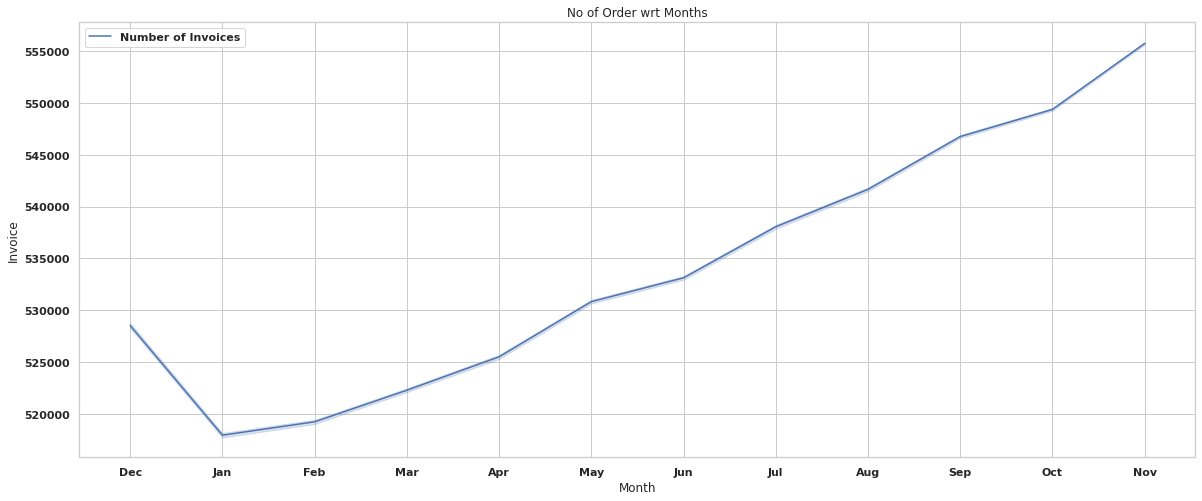

In [ ]:
figsize=(20, 8)
f, ax = plt.subplots(1, 1, figsize=figsize)
ax = sns.lineplot(ax = ax,x="Month", y="Invoice", data = df, label="Number of Invoices").set_title('No of Order wrt Months')

## How many orders per day?

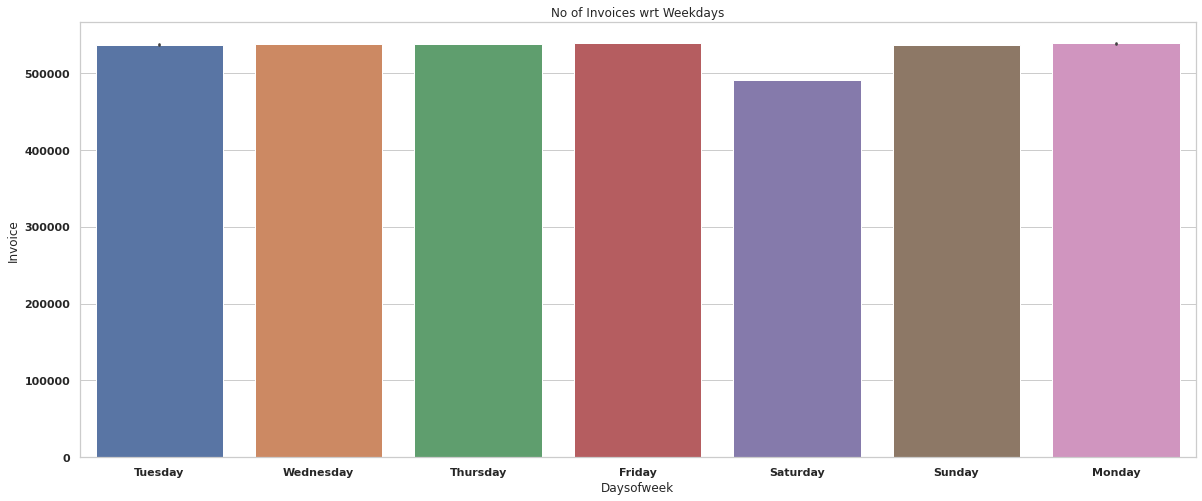

In [ ]:
figsize=(20, 8)
f, ax = plt.subplots(1, 1, figsize=figsize)
ax = sns.barplot(ax = ax, x="Daysofweek", y="Invoice", data = df).set_title('No of Invoices wrt Weekdays')

**Top 10 Expensive Products**

In [ ]:
Exp=df.groupby('DigitStockCode',as_index=False)['Description','Price'].max()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


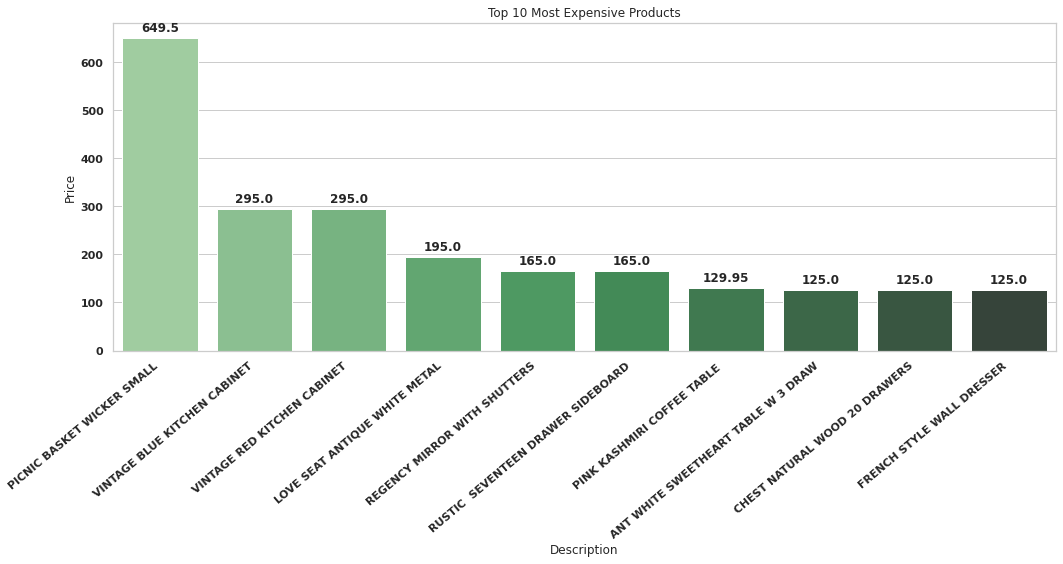

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Top 10 Most Expensive Products')
splot = sns.barplot(x='Description',y='Price',palette="Greens_d" ,data=Exp.sort_values(by=('Price'),ascending=False).head(10))
for p in splot.patches:
        splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


**`Top 10 Cancelled Products**

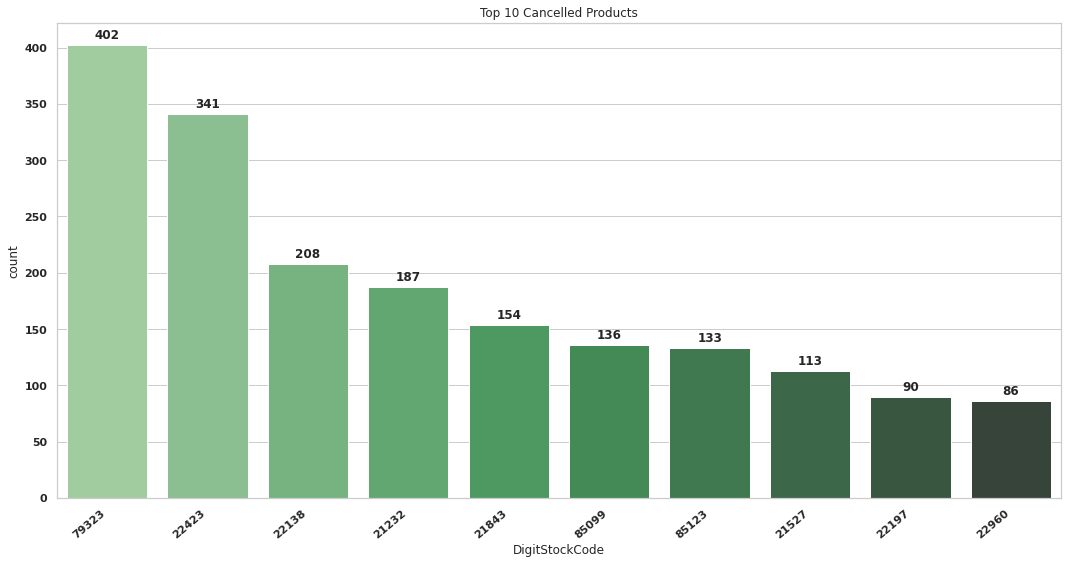

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Top 10 Cancelled Products')
splot = sns.countplot(x='DigitStockCode',palette="Greens_d",data=CancelOrder_df,order=CancelOrder_df.DigitStockCode.value_counts().iloc[:10].index)
for p in splot.patches:
        splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
cancelProduct=CancelOrder_df.groupby(['DigitStockCode','Versions'])['Customer ID'].count().reset_index()
cancelProduct.sort_values('Customer ID', ascending=False).head(15)

,DigitStockCode,Versions,Customer ID
1168,22423,Orignal,341
928,22138,Orignal,208
351,21232,Orignal,187
737,21843,Orignal,154
2249,79323,P,146
2645,85123,A,133
2252,79323,W,124
533,21527,Orignal,113
984,22197,Orignal,90
1605,22960,Orignal,86


**Top 10 Cancelled Products with their version**

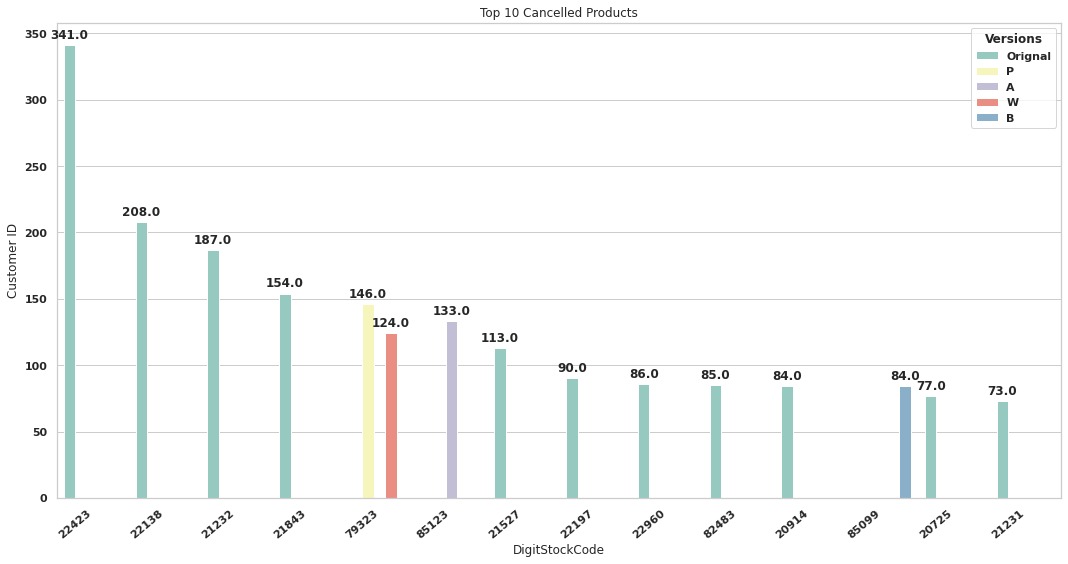

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Top 10 Cancelled Products')
splot = sns.barplot(x='DigitStockCode',y='Customer ID',hue='Versions',palette="Set3", data=cancelProduct.sort_values('Customer ID', ascending=False).head(15))
for p in splot.patches:
        splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Top 10 Countries with most Customers**

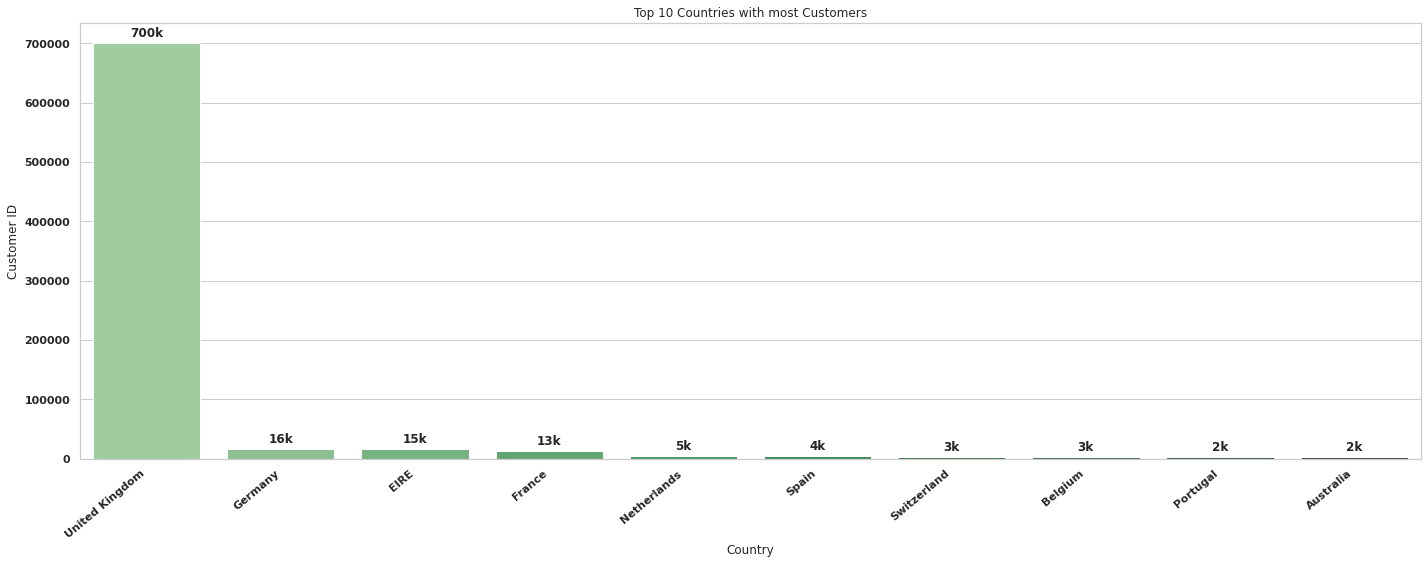

In [ ]:
CountryCustomer=df.groupby(['Country'])['Customer ID'].count().nlargest(10).reset_index()
plt.figure(figsize=(20, 8))
plt.title('Top 10 Countries with most Customers')
splot = sns.barplot(x="Country",y='Customer ID',palette="Greens_d",data=CountryCustomer)
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Top 10 Yearwise Customers W.R.T Countries**

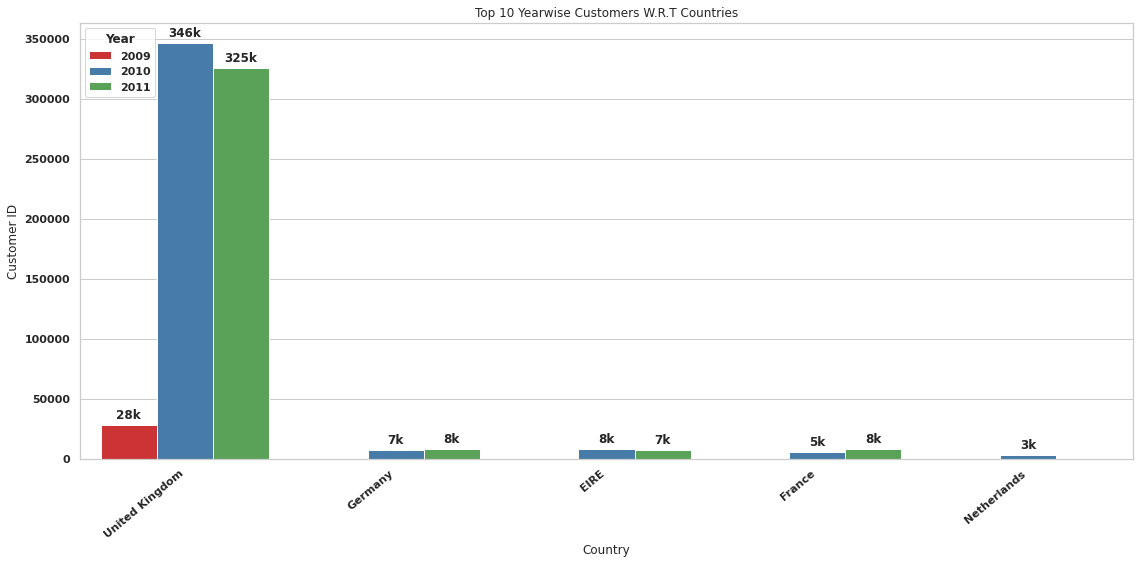

In [ ]:
CountryCustomer=df.groupby(['Country','Year'])['Customer ID'].count().nlargest(10).reset_index()
plt.figure(figsize=(16, 8))
plt.title('Top 10 Yearwise Customers W.R.T Countries')
splot = sns.barplot(x="Country",y='Customer ID',hue='Year',palette='Set1',data=CountryCustomer)
for p in splot.patches:
  if(p.get_height()>0):
    splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Top 10 Countries with Highest Sales**

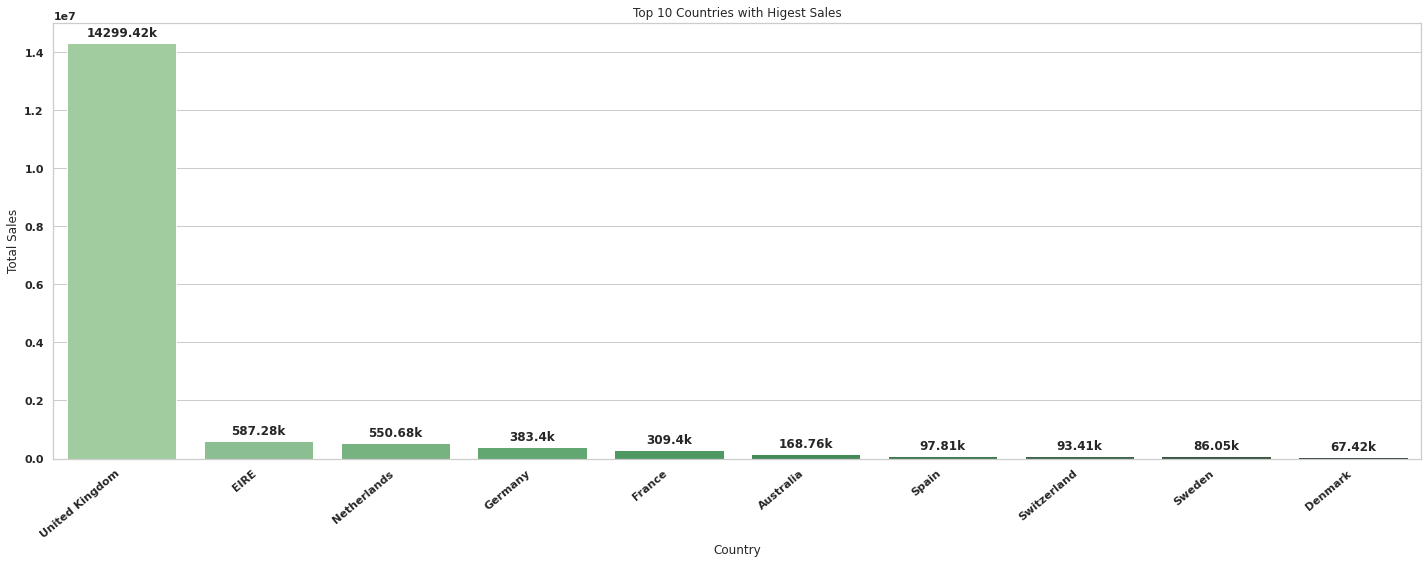

In [ ]:
CountrySales=df.groupby(['Country'])['Total Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(20, 8))
plt.title('Top 10 Countries with Higest Sales')
splot = sns.barplot(x="Country",y='Total Sales',palette="Greens_d",data=CountrySales)
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Top 10 Yearwise Sales W.r.t Countries**



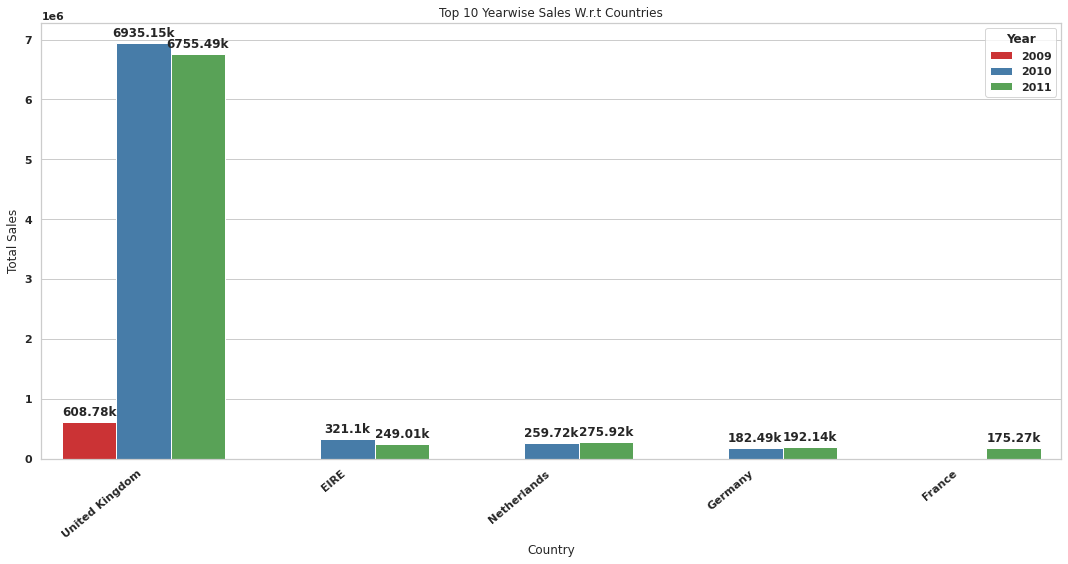

In [ ]:
CountrySales=df.groupby(['Country','Year'])['Total Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(15, 8))
plt.title('Top 10 Yearwise Sales W.r.t Countries')
splot = sns.barplot(x="Country",y='Total Sales',hue='Year',palette='Set1',data=CountrySales)
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Top 10 Countries with Lowest Sales**

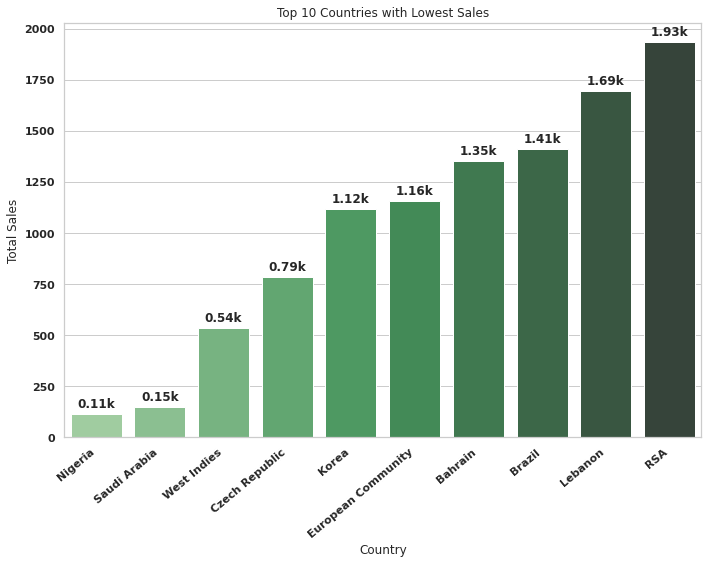

In [ ]:
CountrySales=df.groupby(['Country'])['Total Sales'].sum().nsmallest(10).reset_index()
plt.figure(figsize=(10, 8))
plt.title('Top 10 Countries with Lowest Sales')
splot = sns.barplot(x="Country",y='Total Sales',palette="Greens_d",data=CountrySales)
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Total Sale w.r.t Internation/Local**

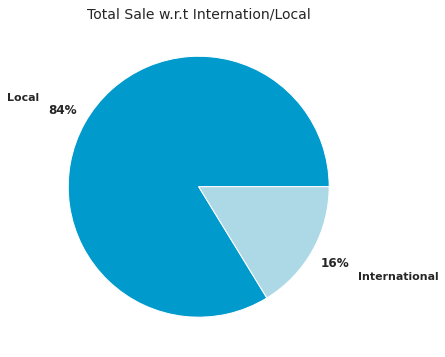

In [ ]:

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', 
                      '#C1F0F6', '#0099CC']
IntLocalSale=df.groupby('International Shipping/Service')['Total Sales'].sum()
pie, ax = plt.subplots(figsize=[10,6])
labels = ['Local','International']
plt.pie(x=IntLocalSale, labels=labels,colors=color_palette_list[0:2], autopct='%1.0f%%', shadow=False, startangle=0,pctdistance=1.2,labeldistance=1.4)
plt.title("Total Sale w.r.t Internation/Local", fontsize=14);

**Yearwise Retail Orders**

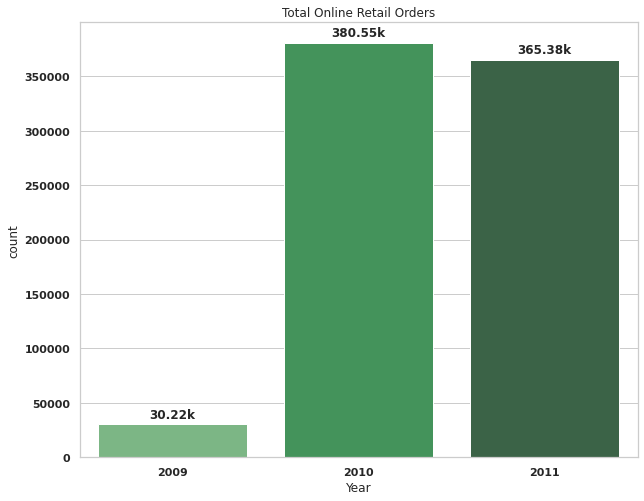

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Total Online Retail Orders')
splot = sns.countplot(x='Year',data=df,palette="Greens_d")
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Total Retails Orders In WeekDays**

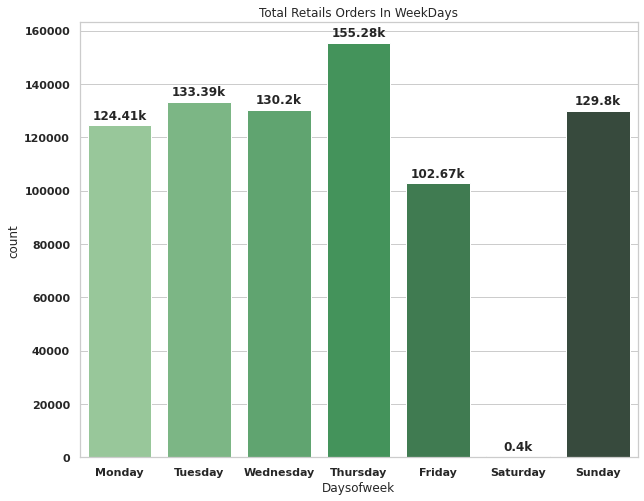

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Total Retails Orders In WeekDays')
splot = sns.countplot(x='Daysofweek',order=WeekDays,palette="Greens_d",data=df)
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Total Retail Orders In WeekDays of Each Year**

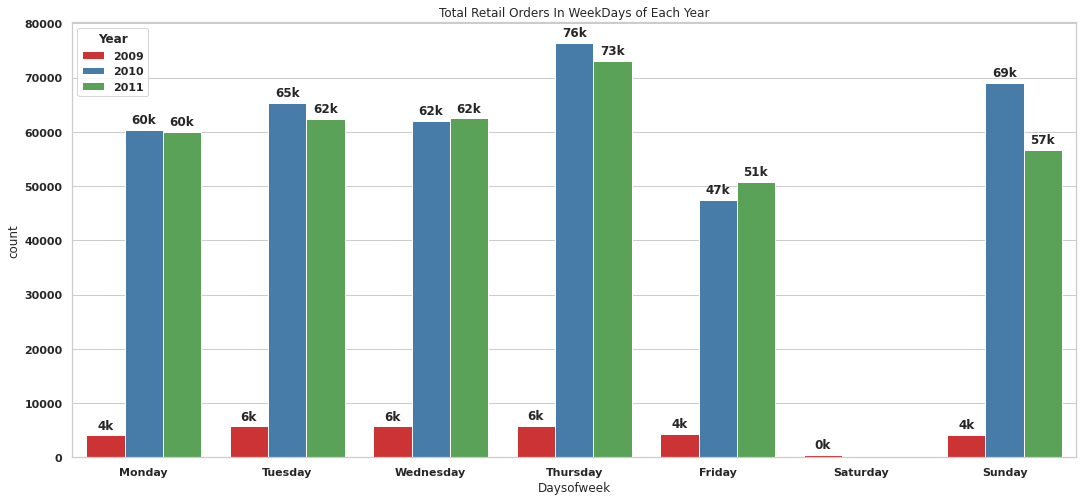

In [ ]:
plt.figure(figsize=(18, 8))
plt.title('Total Retail Orders In WeekDays of Each Year')
splot = sns.countplot(x='Daysofweek',hue='Year',palette='Set1',order=WeekDays,data=df.sort_values(by=['Daysofweek']))
for p in splot.patches:
  if(p.get_height()>0):
    splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


**Total Retails Orders In each Month**

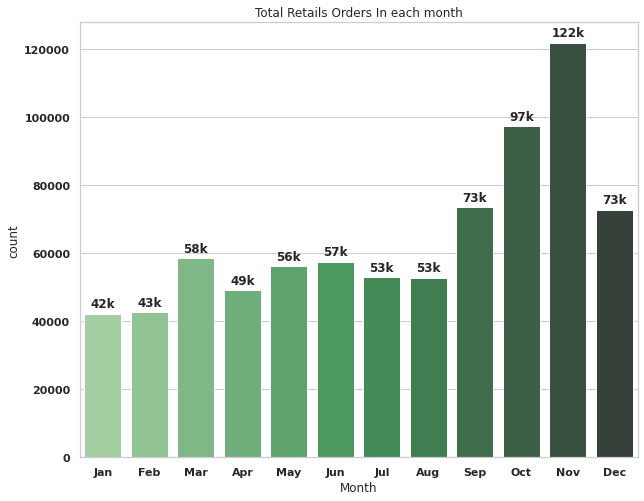

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Total Retails Orders In each month')
splot = sns.countplot(x='Month',data=df,order=Months,palette='Greens_d')
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

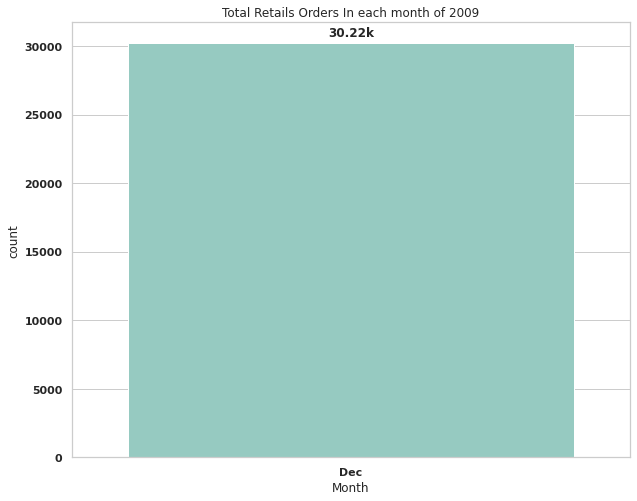

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Total Retails Orders In each month of 2009')
splot = sns.countplot(x='Month',data=df[df['Year']==2009],palette='Set3')
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

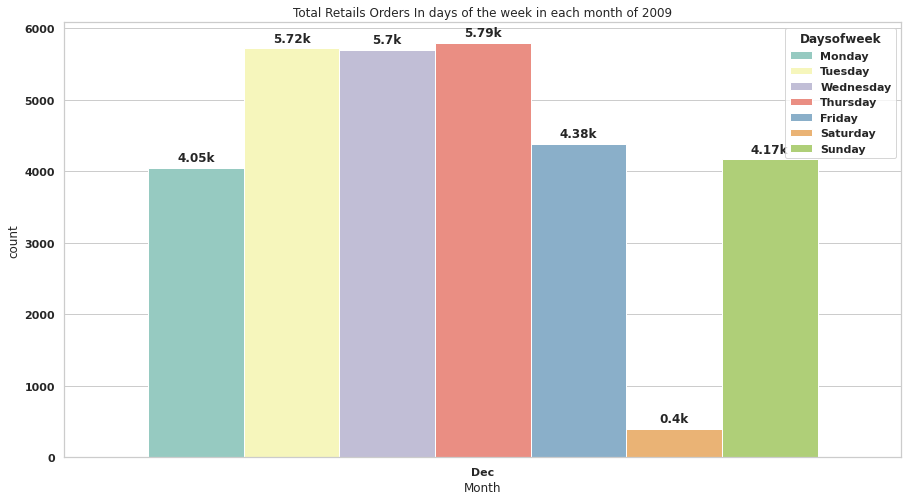

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Total Retails Orders In days of the week in each month of 2009')
splot = sns.countplot(x='Month',hue='Daysofweek',data=df[df['Year']==2009],hue_order=WeekDays,palette='Set3')
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

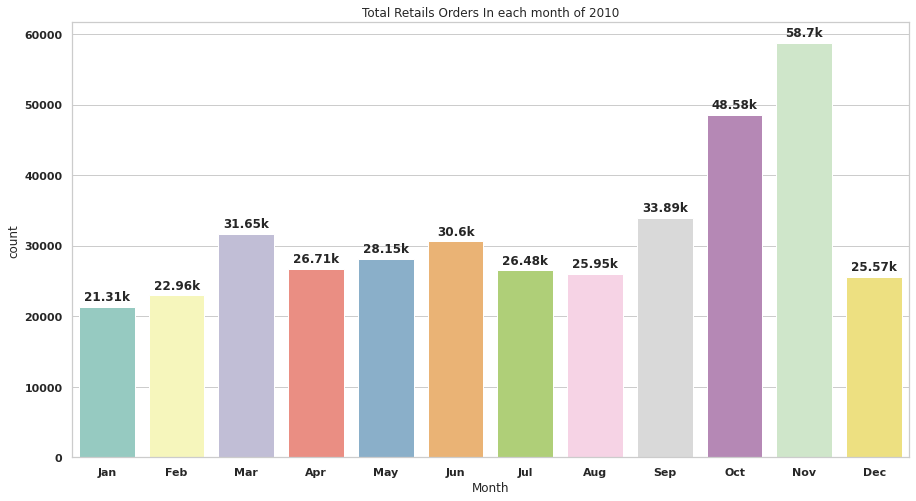

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Total Retails Orders In each month of 2010')
splot = sns.countplot(x='Month',data=df[df['Year']==2010],order=Months,palette='Set3')
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

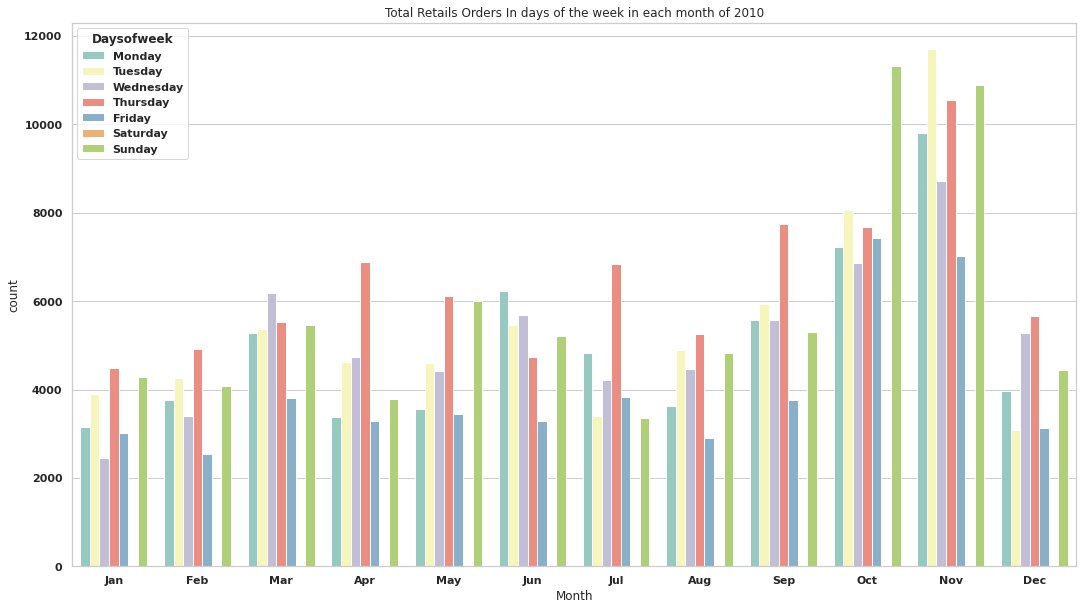

In [ ]:
plt.figure(figsize=(18,10 ))
plt.title('Total Retails Orders In days of the week in each month of 2010')
splot = sns.countplot(x='Month',hue='Daysofweek',data=df[df['Year']==2010],order=Months,hue_order=WeekDays,palette='Set3')

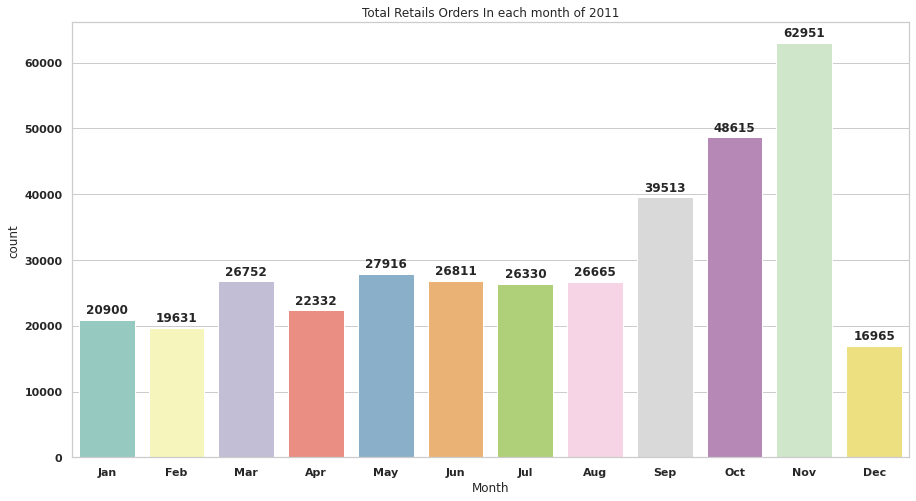

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Total Retails Orders In each month of 2011')
splot = sns.countplot(x='Month',data=df[df['Year']==2011],order=Months,palette='Set3')
for p in splot.patches:
        splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Relationship between Customer Sales and Quatities**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


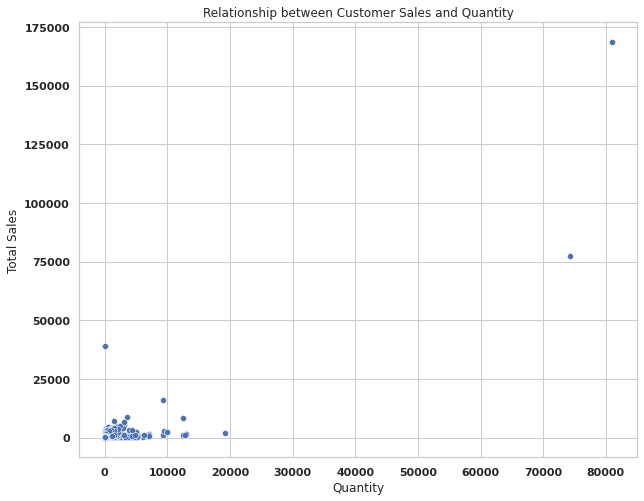

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Relationship between Customer Sales and Quantity')
sns.scatterplot(df['Quantity'],df['Total Sales'])

In [ ]:
np.corrcoef(df['Quantity'], df['Total Sales'])

array([[1.        , 0.83372743],
       [0.83372743, 1.        ]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

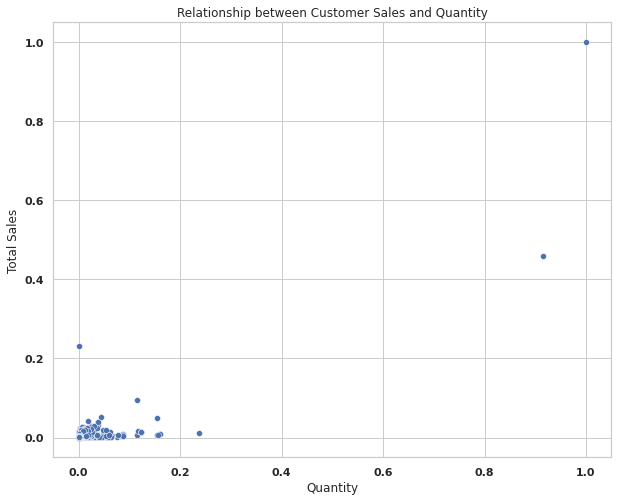

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
new_df=df[['Quantity','Total Sales']]
scaler = MinMaxScaler()
new_df[['Quantity','Total Sales']]=scaler.fit_transform(new_df[['Quantity','Total Sales']])
new_df.head()
plt.figure(figsize=(10, 8))
plt.title('Relationship between Customer Sales and Quantity')
sns.scatterplot(new_df['Quantity'],new_df['Total Sales'])

The Correlation Value between Quantity and Customer Sale is 0.83. which show it is fairly strong positive relationship between them.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


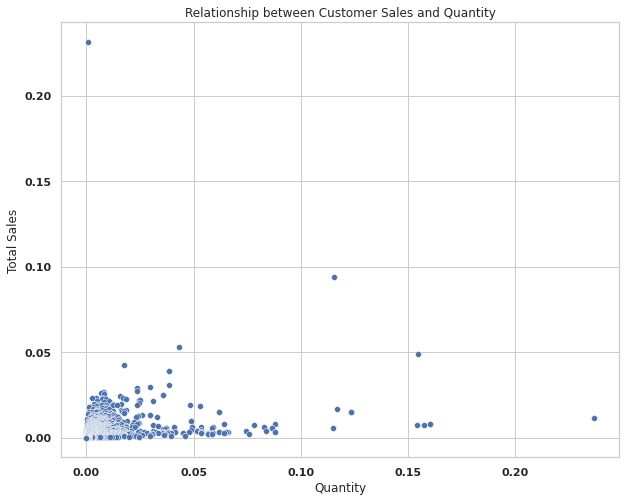

In [ ]:
new_df=new_df.sort_values('Total Sales', ascending=False).iloc[2:]
plt.figure(figsize=(10, 8))
plt.title('Relationship between Customer Sales and Quantity')
sns.scatterplot(new_df['Quantity'],new_df['Total Sales'])

In [ ]:
np.corrcoef(new_df['Quantity'], new_df['Total Sales'])

array([[1.        , 0.42383439],
       [0.42383439, 1.        ]])

**Aggregated Sales per date**

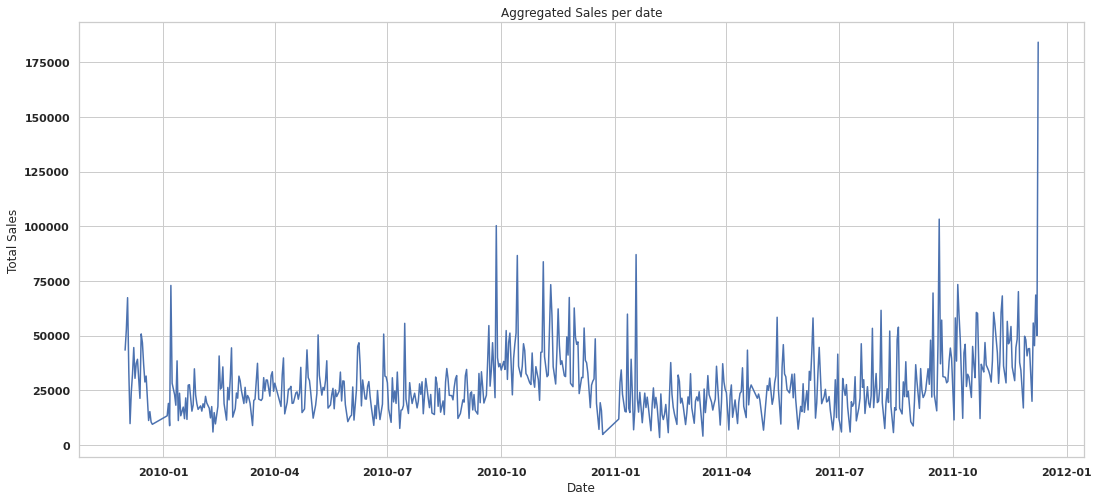

In [ ]:

plt.figure(figsize=(18, 8))
plt.title('Aggregated Sales per date')
splot = sns.lineplot(x='Date', y='Total Sales', data=df.groupby('Date')['Total Sales'].sum().reset_index(),palette='Greens_d')

**Top 20 Items based on Quantity Sold**

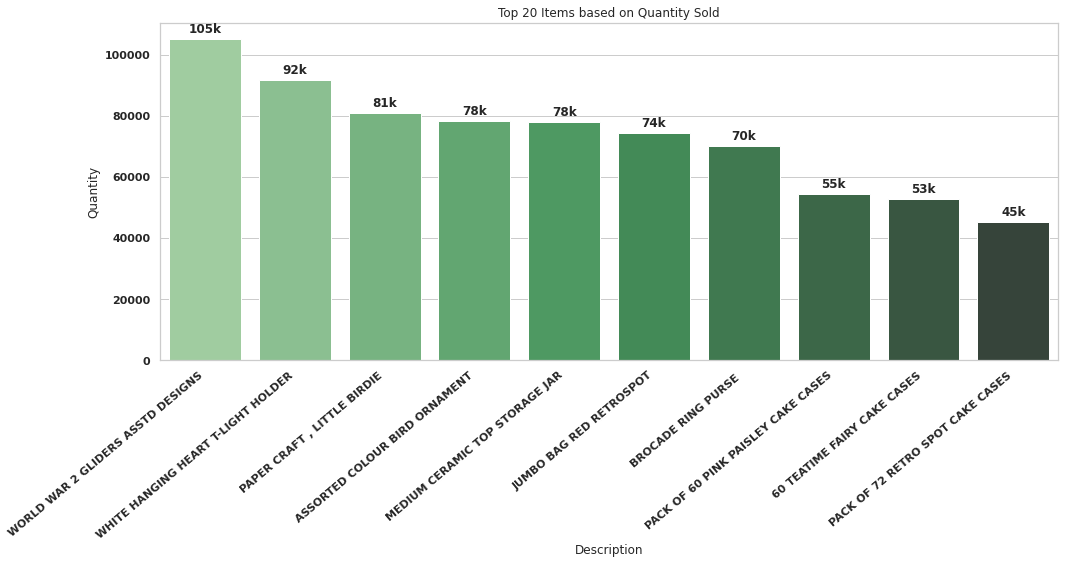

In [ ]:
SoldItems=df.groupby(['DigitStockCode','Description'])['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(15, 8))
plt.title('Top 20 Items based on Quantity Sold')
splot = sns.barplot(x='Description',y='Quantity',data=SoldItems,palette='Greens_d')
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Top 10 Countries based on the Quantity Sold**

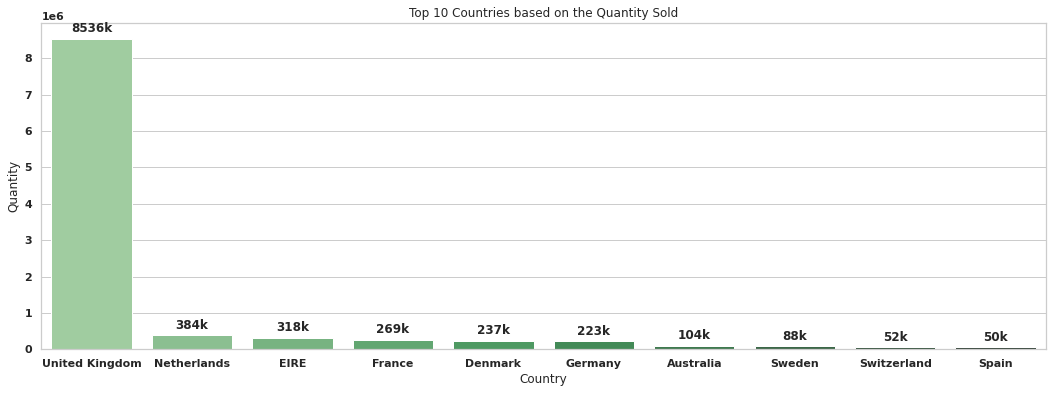

In [ ]:
SoldItems=df.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(18, 6))
plt.title('Top 10 Countries based on the Quantity Sold')
splot = sns.barplot(x='Country',y='Quantity',data=SoldItems,palette='Greens_d')
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


# **`Total Sales in hour`**

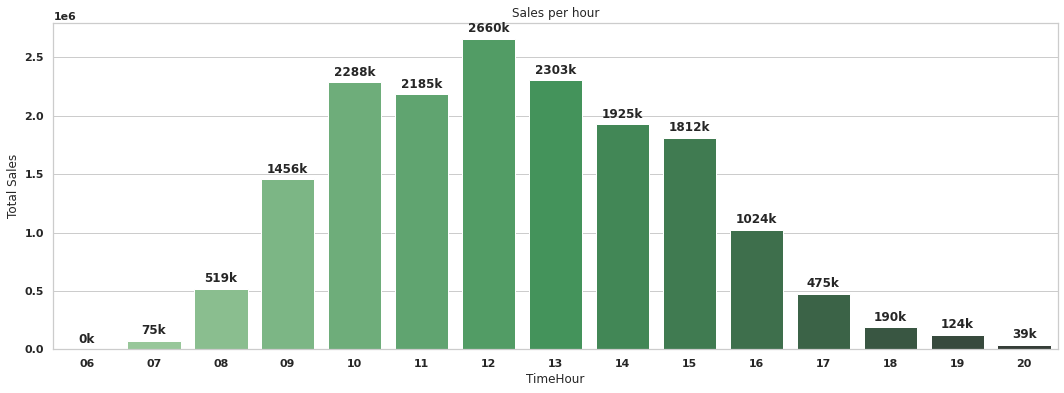

In [ ]:
SoldItems=df.groupby(['TimeHour'])['Total Sales'].sum().reset_index()
plt.figure(figsize=(18, 6))
plt.title('Sales per hour')
splot = sns.barplot(x='TimeHour',y='Total Sales',data=SoldItems,palette='Greens_d')
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


**Top items by top sales hours**

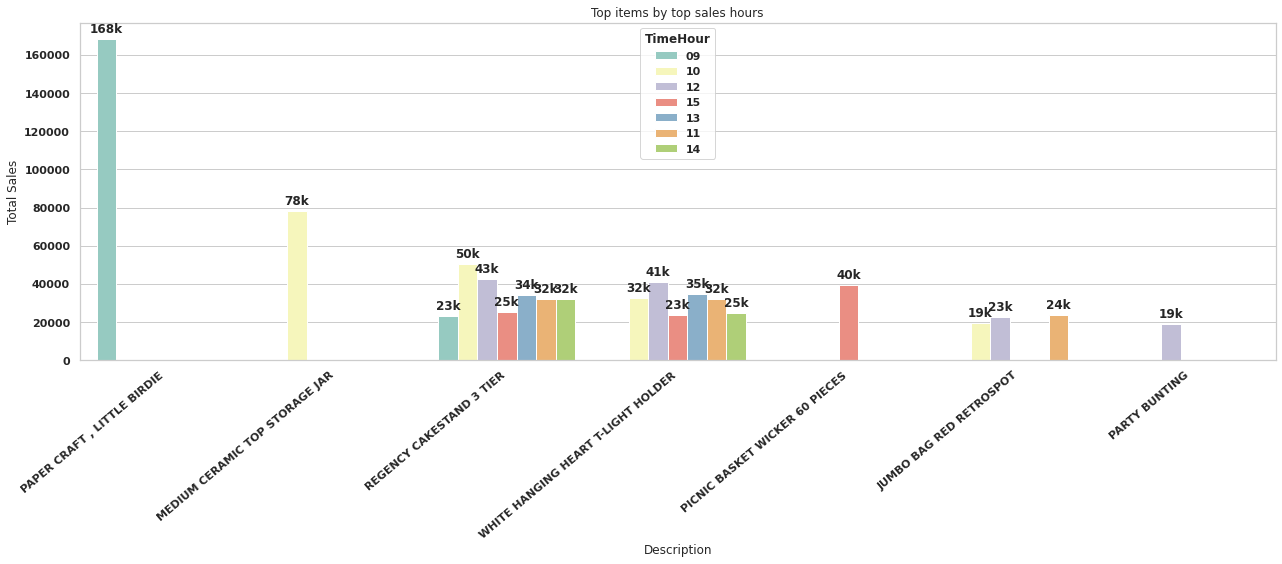

In [ ]:
SoldItems=df.groupby(['TimeHour','Description'])['Total Sales'].sum().reset_index()

plt.figure(figsize=(18, 8))
plt.title('Top items by top sales hours')
splot = sns.barplot(x='Description' ,hue='TimeHour',y='Total Sales',data=SoldItems.sort_values('Total Sales',ascending=False).head(20),palette='Set3')
for p in splot.patches:
    if(p.get_height()>0):
      splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Mapping and Ranking items Quantity Sold in each country**

In [ ]:
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
title_html = '''<h3 align="center" style="font-size:16px"><b>Mapping and Ranking items Quantity Sold in each country</b></h3>'''
world_map.get_root().html.add_child(folium.Element(title_html))
marker_cluster = MarkerCluster().add_to(world_map)
CountryQuantity=df.groupby(['Country','Latitude','Longitude'])['Quantity'].sum().sort_values(ascending=False).reset_index()
#for each coordinate, create circlemarker of user percent
for index, row in CountryQuantity.iterrows():
        lat = CountryQuantity.loc[index,'Latitude']
        long =CountryQuantity.loc[index,'Longitude']
        radius=5
        
        popup_text = """Country : {}<br>
                    Sold items Quantity: {}<br>
                    Sold Quantity Ranking:{}"""
        popup_text = popup_text.format(CountryQuantity.loc[index,'Country'],
                                   CountryQuantity.loc[index,'Quantity'],index+1
                                   )
        iframe = folium.IFrame(popup_text,width=250,height=60)
        popup = folium.Popup(iframe,max_width=250)
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup, fill =True).add_to(marker_cluster)
#show the map
world_map


**Mapping and Ranking Total Sales in each country**

In [ ]:
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
title_html = '''<h3 align="center" style="font-size:16px"><b>Mapping and Ranking Total sales in each country</b></h3>'''
world_map.get_root().html.add_child(folium.Element(title_html))
marker_cluster = MarkerCluster().add_to(world_map)
CountryQuantity=df.groupby(['Country','Latitude','Longitude'])['Total Sales'].sum().sort_values(ascending=False).reset_index()
#for each coordinate, create circlemarker of user percent
for index, row in CountryQuantity.iterrows():
        lat = CountryQuantity.loc[index,'Latitude']
        long =CountryQuantity.loc[index,'Longitude']
        radius=5
        
        popup_text = """Country : {}<br>
                    Total Sales: {}<br>
                    Sale Ranking: {}<br>"""
        popup_text = popup_text.format(CountryQuantity.loc[index,'Country'],
                                   format(round(CountryQuantity.loc[index,'Total Sales']/1000))+'K',index+1
                                   )
        iframe = folium.IFrame(popup_text,width=250,height=60)
        popup = folium.Popup(iframe,max_width=250)
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup, fill =True).add_to(marker_cluster)
#show the map
world_map

# **Time Series Analysis**

In [ ]:
! pip install pmdarima

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller


In [ ]:
Timedata=df.groupby('Date',as_index=True)['Total Sales'].sum()
Timedata=pd.DataFrame(Timedata)
Timedata.index=pd.to_datetime(Timedata.index)

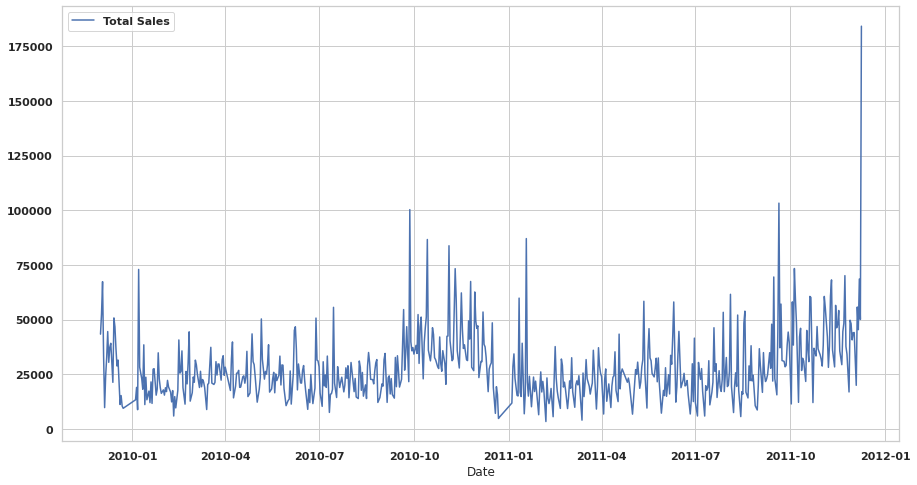

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=Timedata)

In [ ]:
#Using Augmented Dickey Fuller Test (ADF Test)
result = adfuller(Timedata['Total Sales'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: ',result[2])
print("Number of observation used : ",result[3])
print("Critical Value ",result[4])

ADF Statistic: -1.576745
p-value: 0.495264
Lags Used:  11
Number of observation used :  592
Critical Value  {'1%': -3.441444394224128, '5%': -2.8664345376276454, '10%': -2.569376663737217}


In [ ]:
Timedata['Sales Lag']=Timedata['Total Sales'].shift(1)
Timedata['First_Difference']=Timedata['Total Sales']-Timedata['Sales Lag']
Timedata.head()

,Total Sales,Sales Lag,First_Difference
Date,,,
2009-12-01,43389.87,NaN,NaN
2009-12-02,52726.60,43389.87,9336.73
2009-12-03,67378.53,52726.60,14651.93
2009-12-04,33620.75,67378.53,-33757.78
2009-12-05,9803.05,33620.75,-23817.70


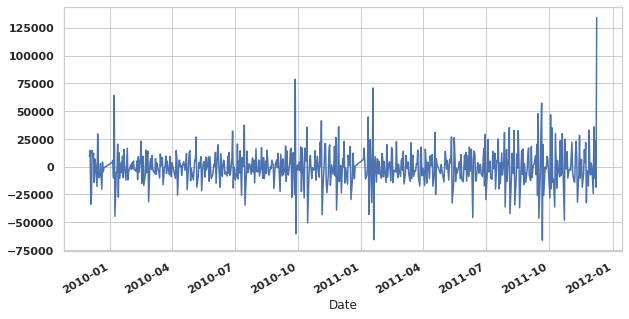

In [ ]:
# Graphical Analysis
Timedata['First_Difference'].plot(figsize=(10,5))

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


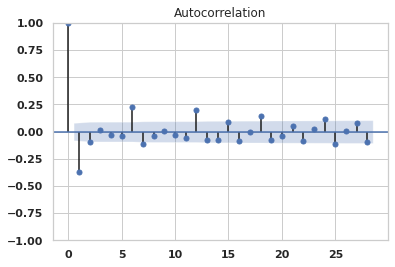

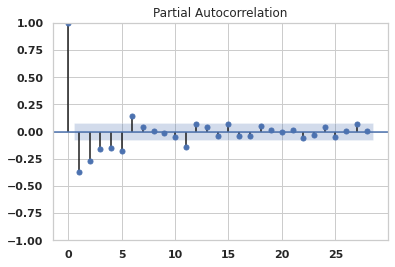

In [ ]:
# using ACF and PACF
plot_acf(Timedata['First_Difference'].dropna())
plot_pacf(Timedata['First_Difference'].dropna())
pyplot.show()

In [ ]:
#Using Augmented Dickey Fuller Test (ADF Test)
result = adfuller(Timedata['First_Difference'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: ',result[2])
print("Number of observation used : ",result[3])
print("Critical Value ",result[4])

ADF Statistic: -11.050743
p-value: 0.000000
Lags Used:  10
Number of observation used :  592
Critical Value  {'1%': -3.441444394224128, '5%': -2.8664345376276454, '10%': -2.569376663737217}


The p-value is obtained less than than significance level of 0.05 and the ADF statistic is lower than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact stationary at first difference

**Figure Out Order of ARIMA Model**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model=pm.auto_arima(Timedata['Total Sales'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13229.839, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13471.051, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13376.357, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13224.452, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13469.164, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13217.264, Time=0.54 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13227.530, Time=0.30 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13232.500, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13222.591, Time=0.63 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=13215.963, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=13223.239, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=13217.594, Time=0.38 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=13217.951, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=13219.857, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  604
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -6604.981
Date:                Fri, 31 Dec 2021   AIC                          13215.963
Time:                        07:11:25   BIC                          13229.168
Sample:                             0   HQIC                         13221.102
                                - 604                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7825      0.045    -17.420      0.000      -0.871      -0.694
ma.L2         -0.1130      0.044     -2.567      0.010      -0.199      -0.027
sigma2      1.865e+08   9.92e-11   1.88e+18      0.000    1.87e+08    1.87e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              9854.00
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.77   Skew:                             2.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.88e+33. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# 0,0,2 ARIMA Model
model = ARIMA(Timedata['Total Sales'], order=(0,0,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:            Total Sales   No. Observations:                  604
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -6656.859
Date:                Fri, 31 Dec 2021   AIC                          13321.719
Time:                        07:11:26   BIC                          13339.333
Sample:                             0   HQIC                         13328.573
                                - 604                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.827e+04   1019.213     27.734      0.000    2.63e+04    3.03e+04
ma.L1          0.3152      0.043      7.322      0.000       0.231       0.400
ma.L2          0.1424      0.038      3.747      0.0

In [ ]:
!pip install statsmodels --upgrade

**Making Prediction on Testing Data**



In [ ]:
# Actual vs Fitted
#model_fit.plot_predict(dynamic=False)
#plt.show()

AttributeError: ignored

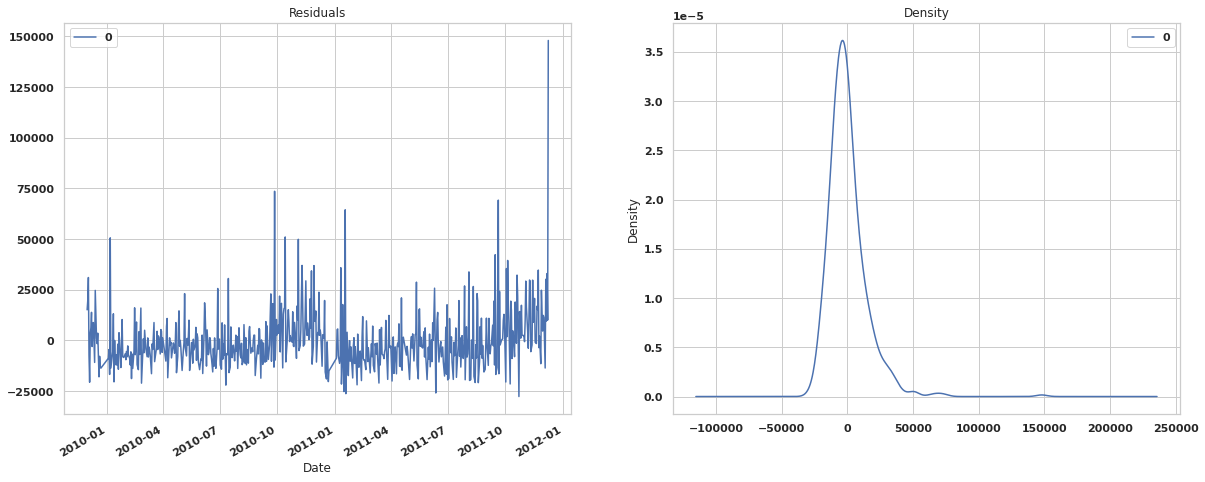

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

**Train the ARIMA Model**

In [ ]:
train=Timedata['Total Sales'][:-100]
test=Timedata['Total Sales'][-100:]
print('The Dimension of Train and test data :',train.shape,test.shape)

The Dimension of Train and test data : (504,) (100,)


In [ ]:
# Build Model
# model = ARIMA(train, order=(1,1,1))  
model = ARIMA(train, order=(0,1,2))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(100, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertib

ValueError: ignored

In [ ]:
# Build Model
model = ARIMA(train, order=(1,2,3))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(100, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertib

                               SARIMAX Results                                
Dep. Variable:            Total Sales   No. Observations:                  504
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -5437.081
Date:                Fri, 31 Dec 2021   AIC                          10884.163
Time:                        07:12:48   BIC                          10905.256
Sample:                             0   HQIC                         10892.438
                                - 504                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.005   -182.876      0.000      -1.011      -0.989
ma.L1         -0.8872     16.000     -0.055      0.956     -32.247      30.473
ma.L2         -1.0000     14.191     -0.070      0.9

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: ignored

In [ ]:
fc_series = pd.Series(fc_series, name='forcast')
lower_series = pd.Series(lower_series, name='Lower CI')
upper_series = pd.Series(upper_series, name='Upper CI')
pd.concat([fc_series, lower_series, upper_series], axis=1)

## **Customer Segmentation using RFM K-Means**

Recency, Frequency, Monetary (RFM) is a marketing tool that uses historical transactions to group your clients into meaningful categories. It uses three factors:

Recency: How many days ago was their last purchase?
Frequency: How many times has the customer purchased from our store?
Monetary: How much the customer spent?
Interpreting one of these three variables separately does not tell you too much. For instance, a client who made a significant purchase six months ago cannot be identified as an essential customer. However, with a combination of the RFM, called RFM score, it is easier to segment it.

To conduct you RFM analysis, the first step is to rank the three variables with a score of 1 (low) to 5(important). With the variable frequency, score 1 will gather 20% of people who come less, whereas 5 means the customers who shop the most frequently. Once you assess all the rank, you concatenate them. It assigns a three-digit RFM score (from 111 to 555) to each customer. A 555 indicates that a customer has purchased a product or service very recently, most frequently, and at the highest monetary value.

RFM is a powerful tool during your marketing campaign. It tells you which segmented group is more likely to respond to your current campaign, which client they should pay more attention to. Therefore, companies decrease the churn rate, focus on the potential and profitable customers.

In [ ]:
rfm=df.copy()

In [ ]:
#Because we are looking at the customer and not the product we drop InvoiceNo and Stcokcode
ab = df.groupby('Customer ID').agg({'InvoiceDate': 'min','Total Sales': 'sum'})
ab.rename(columns={'InvoiceDate': "Recency",('InvoiceDate', 'nunique'): "Frequency","Total Sales": 'Monetization'},  inplace = True)
frequency = df.groupby('Customer ID').agg({'InvoiceDate':'nunique'})
frequency.rename(columns={'InvoiceDate': "Frequency"}, inplace = True)

rfm = pd.merge(ab,frequency, on='Customer ID')

#rfm.rename(columns={('InvoiceDate',     'min'): "Recency",('InvoiceDate', 'nunique'): "Frequency","Total Sales": 'Monetization'})

In [ ]:
a = rfm.reset_index()

In [ ]:
rfm.rename(columns={'InvoiceDate': "Recency",'InvoiceDate': "Frequency","Total Sales": 'Monetization'})

,Recency,Monetization,Frequency
Customer ID,,,
12346.0,2010-03-02 13:08:00,77352.96,3
12347.0,2010-10-31 14:20:00,4921.53,8
12348.0,2010-09-27 14:59:00,1658.40,5
12349.0,2010-04-29 13:20:00,3678.69,3
12350.0,2011-02-02 16:01:00,294.40,1
...,...,...,...
18283.0,2010-02-19 17:16:00,2658.95,22
18284.0,2010-10-04 11:33:00,411.68,1
18285.0,2010-02-17 10:24:00,377.00,1


In [ ]:
rfm.describe()

,Monetization,Frequency
count,5847.000000,5847.000000
mean,2920.016706,6.241833
std,14325.719100,12.691247
min,2.950000,1.000000
25%,339.965000,1.000000
50%,857.460000,3.000000
75%,2242.255000,7.000000
max,580987.040000,374.000000


In [ ]:
#We save the most recent date to, then , calulate the recency
e = df['InvoiceDate'].min()
print('minimun :'+ str(e))

minimun :2009-12-01 07:45:00


In [ ]:
rfm.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 5847 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Recency       5847 non-null   datetime64[ns]
 1   Monetization  5847 non-null   float64       
 2   Frequency     5847 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 182.7 KB


In [ ]:
###create receny, cad calculate the last time he bought something compare to e
rfm['Recency'] = rfm['Recency'].apply(lambda x : (x - e).days)

Now we re going to create the rank with 5 class


In [ ]:
#why do we rank it and how?
rfm['Rank_Recency'] = pd.qcut( rfm['Recency'],q=5, labels = range(6, 1, -1))
rfm['Rank_Recency'] = pd.to_numeric(rfm['Rank_Recency'])

In [ ]:
def freq(x):
    if x ==1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x == 4:
        return 4
    else: 
        return 5

rfm['Rank_Frequency'] =rfm['Frequency'].apply(freq)

In [ ]:
rfm['Rank_Monetization'] = pd.qcut( rfm['Monetization'],q=5, labels = range(1, 6, 1))
rfm['Rank_Monetization'] = pd.to_numeric(rfm['Rank_Monetization'])

In [ ]:
rfm['RFM_Score'] = rfm['Rank_Recency'].astype(str)+ rfm['Rank_Frequency'].astype(str) + rfm['Rank_Monetization'].astype(str)
rfm['Score'] = rfm['Rank_Recency']+ rfm['Rank_Frequency']+ rfm['Rank_Monetization']

In [ ]:
rfm.describe()

,Recency,Monetization,Frequency,Rank_Recency,Rank_Frequency,Rank_Monetization,Score
count,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000
mean,264.517530,2920.016706,6.241833,4.003421,3.102617,3.000000,10.106037
std,223.264146,14325.719100,12.691247,1.414209,1.675344,1.414576,3.800315
min,0.000000,2.950000,1.000000,2.000000,1.000000,1.000000,4.000000
25%,72.000000,339.965000,1.000000,3.000000,1.000000,2.000000,7.000000
50%,209.000000,857.460000,3.000000,4.000000,3.000000,3.000000,10.000000
75%,427.000000,2242.255000,7.000000,5.000000,5.000000,4.000000,14.000000
max,738.000000,580987.040000,374.000000,6.000000,5.000000,5.000000,16.000000


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5847 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recency            5847 non-null   int64  
 1   Monetization       5847 non-null   float64
 2   Frequency          5847 non-null   int64  
 3   Rank_Recency       5847 non-null   int64  
 4   Rank_Frequency     5847 non-null   int64  
 5   Rank_Monetization  5847 non-null   int64  
 6   RFM_Score          5847 non-null   object 
 7   Score              5847 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 411.1+ KB


In [ ]:
def client_segment(x):
    if x == 15:
        return 'Champions'
    elif  x >= 14:
        return 'Loyal Customers'
    elif  x >= 11:
        return 'Can’t Lose Them'
    elif  x >= 9:
        return 'Potential Loyalist'
    elif  x >= 7:
        return 'Promising'
    elif  x >= 6:
        return 'Needs Attention'
    elif  x >= 5:
        return 'At Risk'
    else:
        return 'Lost'

In [ ]:
rfm['Clients'] = rfm['Score'].apply(client_segment)

In [ ]:
rfm

,Recency,Monetization,Frequency,Rank_Recency,Rank_Frequency,Rank_Monetization,RFM_Score,Score,Clients
Customer ID,,,,,,,,,
12346.0,91,77352.96,3,5,3,5,535,13,Can’t Lose Them
12347.0,334,4921.53,8,3,5,5,355,13,Can’t Lose Them
12348.0,300,1658.40,5,4,5,4,454,13,Can’t Lose Them
12349.0,149,3678.69,3,4,3,5,435,12,Can’t Lose Them
12350.0,428,294.40,1,3,1,2,312,6,Needs Attention
...,...,...,...,...,...,...,...,...,...
18283.0,80,2658.95,22,5,5,4,554,14,Loyal Customers
18284.0,307,411.68,1,3,1,2,312,6,Needs Attention
18285.0,78,377.00,1,5,1,2,512,8,Promising


In [ ]:
clients = rfm[['Clients', 'Frequency', 'Monetization', 'Recency']].groupby('Clients').median()
clients.reset_index(inplace = True)

Text(0.5, 1.0, 'Median Visits')

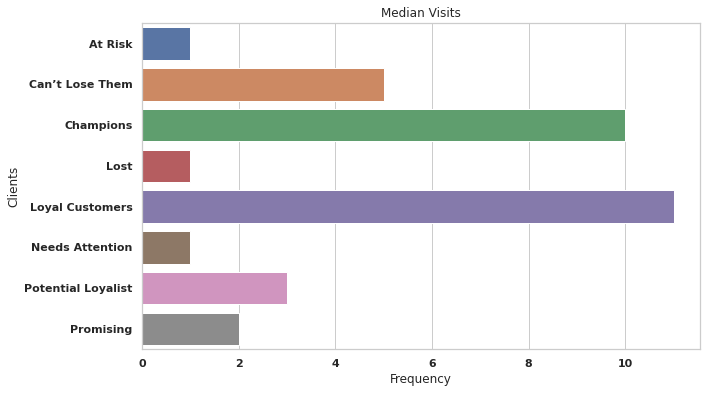

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
ax = sns.barplot(x="Frequency", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median Visits')

Text(0.5, 1.0, 'Median Expenditure')

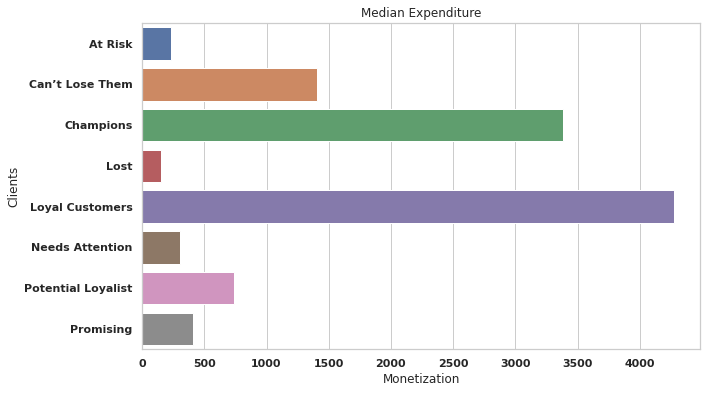

In [ ]:
ax = sns.barplot(x="Monetization", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median Expenditure')

Text(0.5, 1.0, 'Median time from last shop ')

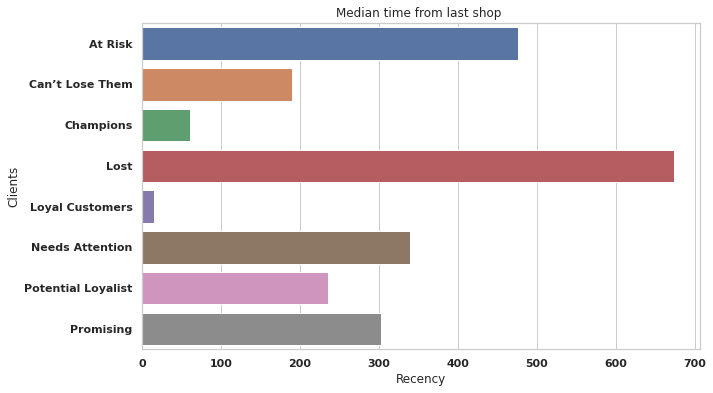

In [ ]:
ax = sns.barplot(x="Recency", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median time from last shop ')

In [ ]:
rfm['Clients'].unique()

array(['Can’t Lose Them', 'Needs Attention', 'Promising',
       'Potential Loyalist', 'Loyal Customers', 'Champions', 'Lost',
       'At Risk'], dtype=object)

In [ ]:
!pip install squarify

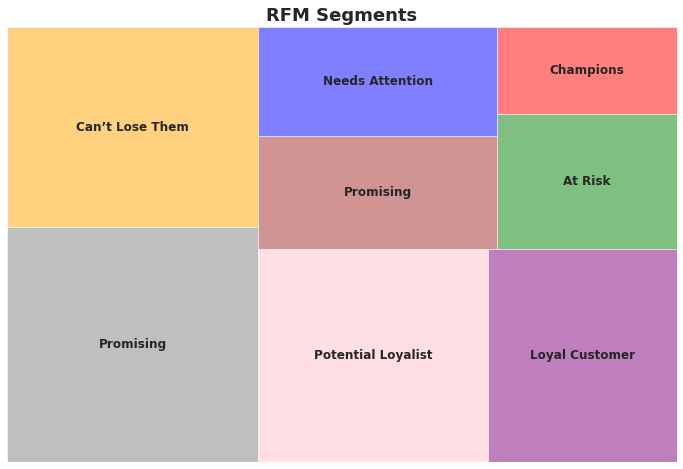

In [ ]:
import squarify

squarity =rfm['Clients'] .value_counts()
color=['grey','orange','pink','purple', 'brown', 'blue', 'green', 'red']


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
squarify.plot(sizes= squarity , 
              label=['Promising',
                     'Can’t Lose Them',
                     'Potential Loyalist',
                     'Loyal Customer',
                     'Promising', 
                     'Needs Attention',
                     'At Risk',
                     'Champions',
                     'Lost',] ,color = color, alpha=0.5,)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
squarity

Can’t Lose Them       1185
Promising             1006
Loyal Customers        982
Potential Loyalist     807
Needs Attention        544
Champions              523
At Risk                488
Lost                   312
Name: Clients, dtype: int64

Interpretation

We have a deeper understanding of our segmentations from the graphs above, from the median expenditure to each group's number. Among the visualization, we observe three horizontal histograms (median frequency, median monetization and median recency for every group of clients) and one squarity.

As we can see in the Median Expenditure graph, our two best categories of clients are champions (in green) and loyal customer(in purple). As we can see, both clients provide almost 80% of our revenue and only represent 22% of our total clients! This follows the 80/20 rule, also known as the Pareto Principle, attributed to the Italian economist Vilfredo Pareto. In one of his papers, Pareto noted that about 80% of Italy's land belonged to approximately 20% of its total population.

This is a presentation of the three different users:

Champions gather 523 customer who has a median expenditure of $3381 and comes almost every month. For marketers, they should be the most critical clients because they make your market sustainable. In this case, you must regularly reward with the promotion or provide to them privilege access.

Potential Loyalist represents 807 of our customers. They play an essential role in the growth of the market. They already show interest in the brand. The next step is to acquire them by building a relationship.

Customers that need attention constitutes 10% of our market. They spend and come below the average. We translated this with a potential loss, increased churn. It is vital to reactive interest with discounts and recommendations. Moreover, you may also receive feedback to improve your process.

In [ ]:
quantiles = rfm.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [ ]:
rfm_segments= rfm

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
rfm_segments['R_Quartile'] = rfm_segments['Recency'].apply(RClass, args=('Recency',quantiles,))
rfm_segments['F_Quartile'] = rfm_segments['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfm_segments['M_Quartile'] = rfm_segments['Monetization'].apply(FMClass, args=('Monetization',quantiles,))

In [ ]:
rfm_segments['RFMClass'] = rfm_segments.R_Quartile.map(str) \
                            + rfm_segments.F_Quartile.map(str) \
                            + rfm_segments.M_Quartile.map(str)

In [ ]:
rfm_segments.head(10)

,Recency,Monetization,Frequency,Rank_Recency,Rank_Frequency,Rank_Monetization,RFM_Score,Score,Clients,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer ID,,,,,,,,,,,,,
12346.0,91,77352.96,3,5,3,5,535,13,Can’t Lose Them,2,3,1,231
12347.0,334,4921.53,8,3,5,5,355,13,Can’t Lose Them,3,1,1,311
12348.0,300,1658.40,5,4,5,4,454,13,Can’t Lose Them,3,2,2,322
12349.0,149,3678.69,3,4,3,5,435,12,Can’t Lose Them,2,3,1,231
12350.0,428,294.40,1,3,1,2,312,6,Needs Attention,4,4,4,444
12352.0,346,1729.54,9,3,5,4,354,12,Can’t Lose Them,3,1,2,312
12353.0,330,406.76,2,3,2,2,322,7,Promising,3,3,3,333
12354.0,506,1079.40,1,2,1,3,213,6,Needs Attention,4,4,2,442
12355.0,171,947.61,2,4,2,3,423,9,Potential Loyalist,2,3,2,232


In [ ]:
print("Always Returing Customers: ",len(rfm_segments[rfm_segments['RFMClass']=='111']),
      "(", round(len(rfm_segments[rfm_segments['RFMClass']=='111'])/len(rfm_segments)*100,2), "%)") 
print('Loyal Customers: ',len(rfm_segments[rfm_segments['F_Quartile']==1]),
      "(", round(len(rfm_segments[rfm_segments['F_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("Customer with Higher Power of Purchase: ",len(rfm_segments[rfm_segments['M_Quartile']==1]), 
      "(", round(len(rfm_segments[rfm_segments['M_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print('Potiential Churners: ', len(rfm_segments[rfm_segments['RFMClass']=='322']),
      "(", round(len(rfm_segments[rfm_segments['RFMClass']=='322'])/len(rfm_segments)*100,2), "%)")
print('Churners: ',len(rfm_segments[rfm_segments['RFMClass']=='444']), 
      "(", round(len(rfm_segments[rfm_segments['RFMClass']=='444'])/len(rfm_segments)*100,2), "%)")


Always Returing Customers:  639 ( 10.93 %)
Loyal Customers:  1290 ( 22.06 %)
Customer with Higher Power of Purchase:  1462 ( 25.0 %)
Potiential Churners:  176 ( 3.01 %)
Churners:  460 ( 7.87 %)


In [ ]:
clients

,Clients,Frequency,Monetization,Recency
0,At Risk,1.0,232.000,476.0
1,Can’t Lose Them,5.0,1402.060,190.0
2,Champions,10.0,3381.260,61.0
3,Lost,1.0,154.410,673.0
4,Loyal Customers,11.0,4271.020,15.0
5,Needs Attention,1.0,305.555,339.5
6,Potential Loyalist,3.0,740.760,236.0
7,Promising,2.0,412.915,303.0


In [ ]:
rfm['Clients'].value_counts()

Can’t Lose Them       1185
Promising             1006
Loyal Customers        982
Potential Loyalist     807
Needs Attention        544
Champions              523
At Risk                488
Lost                   312
Name: Clients, dtype: int64

## **CLUSTER**

**Unsupervised** is a type of machine learning that concludes from a data set without a target variable. We usually implement this method to find a hidden pattern or understand the structure of the data. It discovers information that may not be visible to the human eye. The most popular method is clustering.

**Clustering** split your data set into several groups. The group are formed of similar data point compared to the other group. We can use this approach for marketing segmentation, medical imaging, and anomaly detection. They are different types of clustering methods, including:

1)Partitioning methods.
2)Hierarchical clustering
3)Fuzzy clustering
4)Density-based clustering
5)Model-based clustering

Analogy:

You had a box of apples of different colors; red, green, and mixed colors. Individually picking each color would not only consume time but is likely to entail manifestations of human error. However, with cluster analysis, we can segment these different apples according to color. With such information, one can harvest information such as how many apples belong to which color, which color is of the best quality, or which color has the least quality.

In [184]:
rfm.head(5)

,Recency,Monetization,Frequency,Rank_Recency,Rank_Frequency,Rank_Monetization,RFM_Score,Score,Clients,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer ID,,,,,,,,,,,,,
12346.0,91,77352.96,3,5,3,5,535,13,Can’t Lose Them,2,3,1,231
12347.0,334,4921.53,8,3,5,5,355,13,Can’t Lose Them,3,1,1,311
12348.0,300,1658.40,5,4,5,4,454,13,Can’t Lose Them,3,2,2,322
12349.0,149,3678.69,3,4,3,5,435,12,Can’t Lose Them,2,3,1,231
12350.0,428,294.40,1,3,1,2,312,6,Needs Attention,4,4,4,444


In [186]:
cluster = rfm.drop(['Rank_Recency','Rank_Frequency','Rank_Monetization','RFM_Score','Score','Clients'], axis = 1)

In [187]:
cluster.head(5)

,Recency,Monetization,Frequency,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer ID,,,,,,,
12346.0,91,77352.96,3,2,3,1,231
12347.0,334,4921.53,8,3,1,1,311
12348.0,300,1658.40,5,3,2,2,322
12349.0,149,3678.69,3,2,3,1,231
12350.0,428,294.40,1,4,4,4,444


# **K-means clustering algorithm**


K-means is one of the most straightforward clustering analysis to implement. It attempts to divide the dataset into a fixed number k of a group. The k refers to the number of centroids you want in your model. A centroid is a point at the center of each cluster. The algorithm then allocates every data point to the nearest cluster while keeping it as small as possible.

The appropriate number of clusters is essential for an optimal score. In marketing, a wrong evaluation of it can result in a poor marketing campaign. For example, If you have five kinds of customers, but you only allow them to be segmented into two groups. Your campaign will not target the right audience, which is translated into a low return on investment (ROI)

## **How do you determine the optimal number?**

The elbow method is one of the best approaches. It runs the model x times with a different value of k. Then, it computes the sum of square error for each iteration and illustrates the outcome with a line chart, which looks like an arm(see elbow method graph). Finally, the value of k is the elbow on the arm. Sometimes, it might be difficult to assess your k with a small range of possibilities.

An additional metric is the silhouette score. The range of the score is between -1(bad) to 1(good). It computes (b-a)/max(a,b) where:

A is the average distance among data points from the same cluster.
B is the average distance among the cluster.

In [188]:
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [190]:
X= MinMaxScaler().fit_transform(cluster)
#x = StandardScaler().fit_transform(X)

The MinMaxScaler scales and translates each feature individually such that it is in the given range on the training set (e.g. between zero and one)

In [ ]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

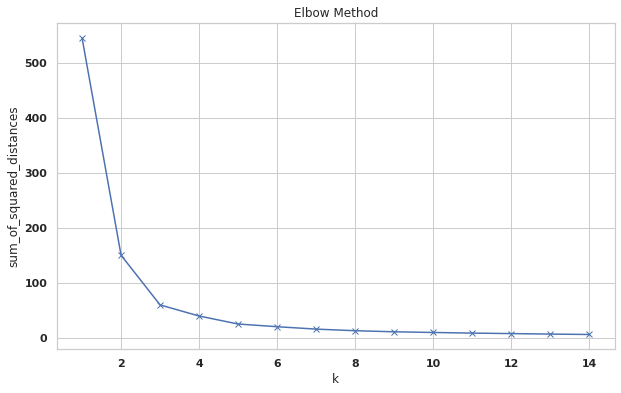

In [ ]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

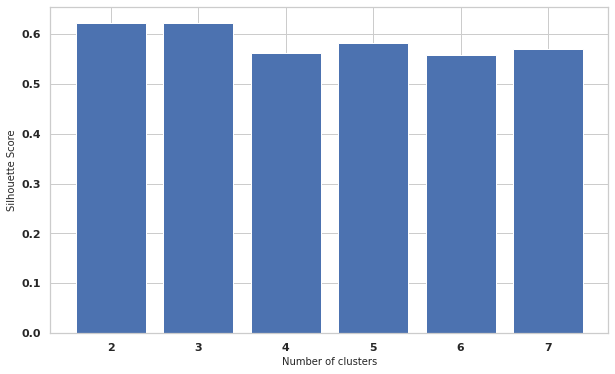

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [ ]:
k_means = KMeans(n_clusters=2)
model = k_means.fit(X)
y_hat = k_means.predict(X)
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')
#metrics.calinski_harabasz_score(X, labels_5)

0.6201101025134698

In [ ]:
cluster['Cluster'] = labels


In [ ]:
table = cluster.groupby('Cluster').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetization': 'mean'})
table['Non-Churner and Churners'] = cluster['Cluster'].value_counts()
table

,Recency,Frequency,Monetization,Non-Churner and Churners
Cluster,,,,
0,129.017179,8.037179,3844.110344,3900
1,535.935799,2.645609,1068.981685,1947
